In [1]:
import os
import numpy as np
import torch
from torch import Tensor
from torch.nn.parameter import Parameter
from torch.autograd import Variable
import torch.nn.functional as F
from lib.dataset_custom import KernDataset,DatasetSplit
from lib.model import ScoreModel
from lib.opt import optimize
from lib.CrossValidation import CrossValidator
from lib.config import corpora_for_classification_all_composers as default_corpora
import lib.media as media

In [2]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='2'
#os.environ['CUDA_LAUNCH_BLOCKING']='1'

checkpoint_dir = '_hybrid_fullconvnet_cv'
context = 500
corpora = tuple(default_corpora)

In [7]:
class Convnet(ScoreModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def define_graph(self, debug=False):
        self.kernel_width = 2 # window with which we scan over time
        k = 300
        
        self.wnotes = Parameter(Tensor(k, 6*self.m, self.kernel_width))
        self.wdurations = Parameter(Tensor(k, 6*self.maxdur, self.kernel_width))
        self.w2 = Parameter(Tensor(k, k, self.kernel_width))
        self.w3 = Parameter(Tensor(k, self.composers))
        self.bias = Parameter(Tensor(self.composers))
    
    def forward(self, x):
        e,t,_,_ = x
        batch_size = e.shape[0]
        
        z1 = F.relu(F.conv1d(e.view(-1,context,6*self.m).transpose(1,2),self.wnotes) \
           + F.conv1d(t.view(-1,context,6*self.maxdur).transpose(1,2),self.wdurations))
        z2 = F.relu(F.conv1d(z1,self.w2))
        z2 = z2.view(batch_size,3,300,-1).mean(1).mean(2)
        return torch.mm(z2, self.w3) + self.bias[None,:].expand(e.shape[0],-1)

---------------------------------------------
---------------------------------------------
Fold 0
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (6000)
bias torch.Size([20]) (20)
Initialized graph with 664820 parameters
Initiating optimizer, 62 iterations/epoch.
acc_tr	acc_ts	iter	loss_tr	loss_ts	time	utime
7.00    7.73    0       4.32    4.32    4.32    3.33    
56.00   55.36   62      1.99    2.19    11.89   3.26    
65.50   62.66   124     1.53    1.79    10.54   2.97    
71.00   65.67   186     1.21    1.54    11.08   3.29    
75.00   69.53   248     1.03    1.33    12.14   3.51    
78.50   73.39   310     0.91    1.28    11.90   3.47    
81.00   72.10   372     0.86    1.41    11.79

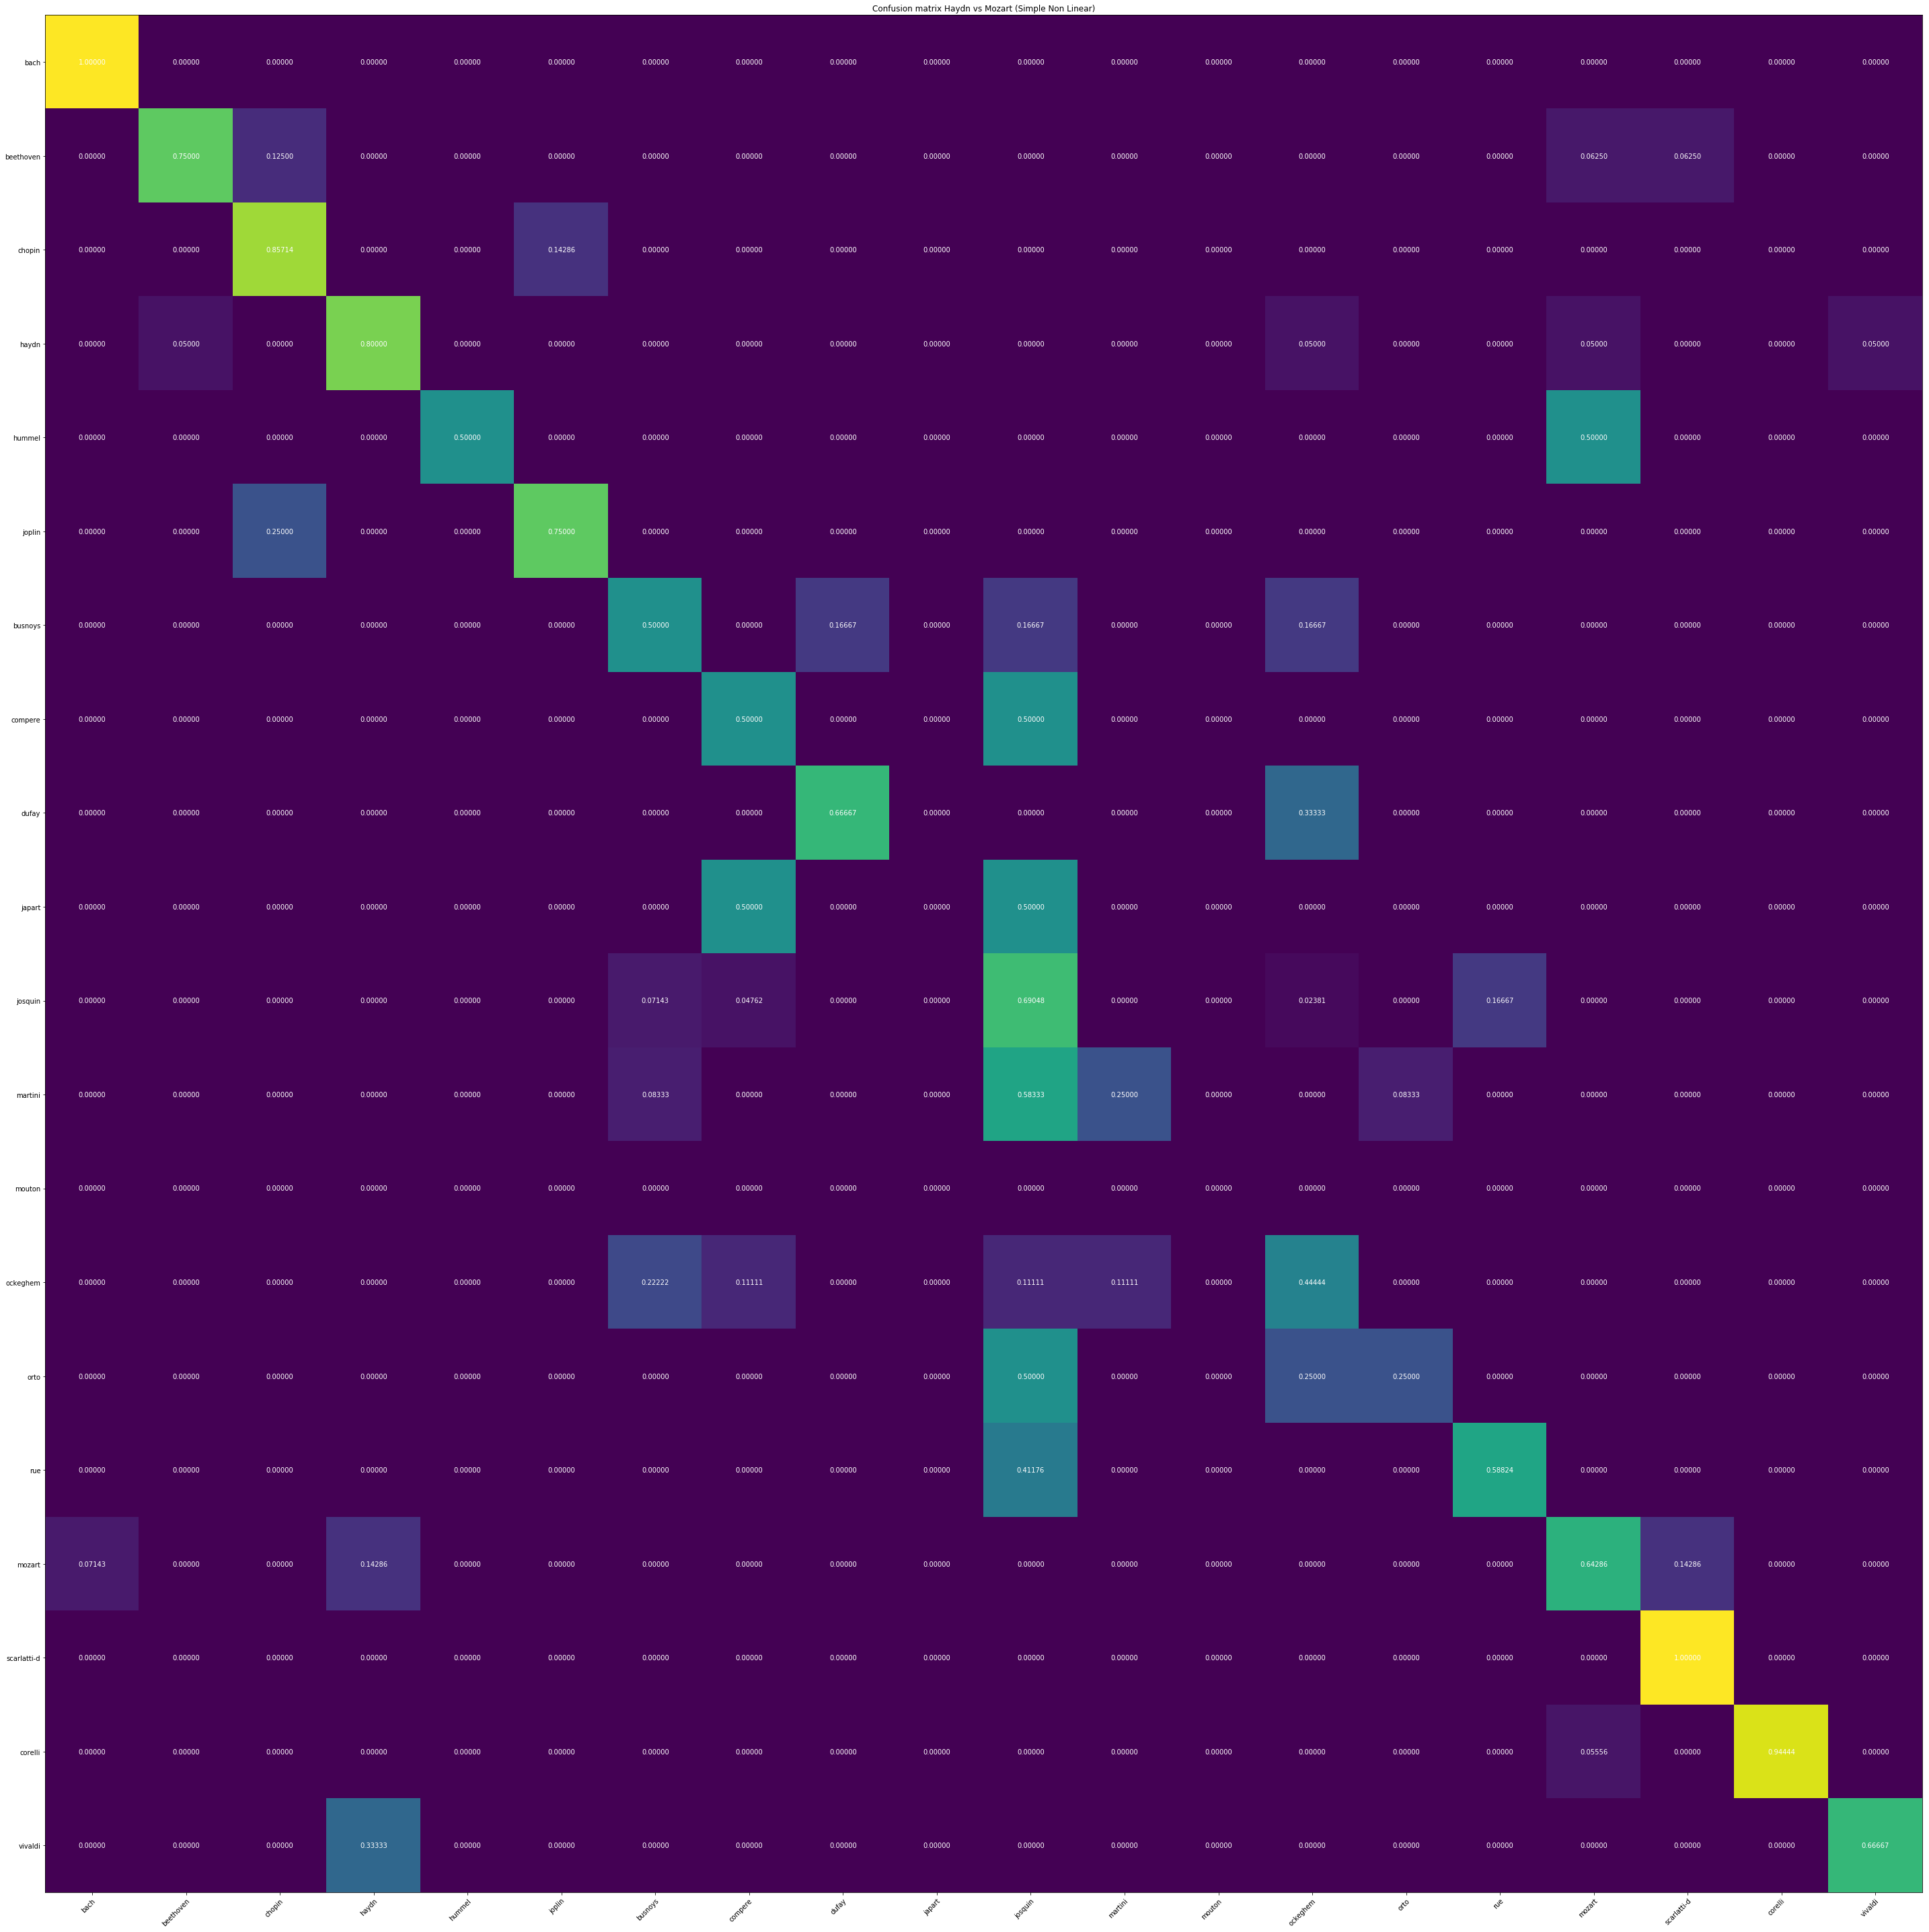

bach 46 / 46 = 1.0
beethoven 12 / 16 = 0.75
busnoys 3 / 6 = 0.5
chopin 6 / 7 = 0.8571428571428571
compere 1 / 2 = 0.5
corelli 17 / 18 = 0.9444444444444444
dufay 2 / 3 = 0.6666666666666666
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 29 / 42 = 0.6904761904761905
martini 3 / 12 = 0.25
mozart 9 / 14 = 0.6428571428571429
ockeghem 4 / 9 = 0.4444444444444444
orto 1 / 4 = 0.25
rue 10 / 17 = 0.5882352941176471
scarlatti-d 5 / 5 = 1.0
vivaldi 2 / 3 = 0.6666666666666666
170 232 0.7327586206896551
---------------------------------------------
---------------------------------------------
Fold 1
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (6000)
bias torch.

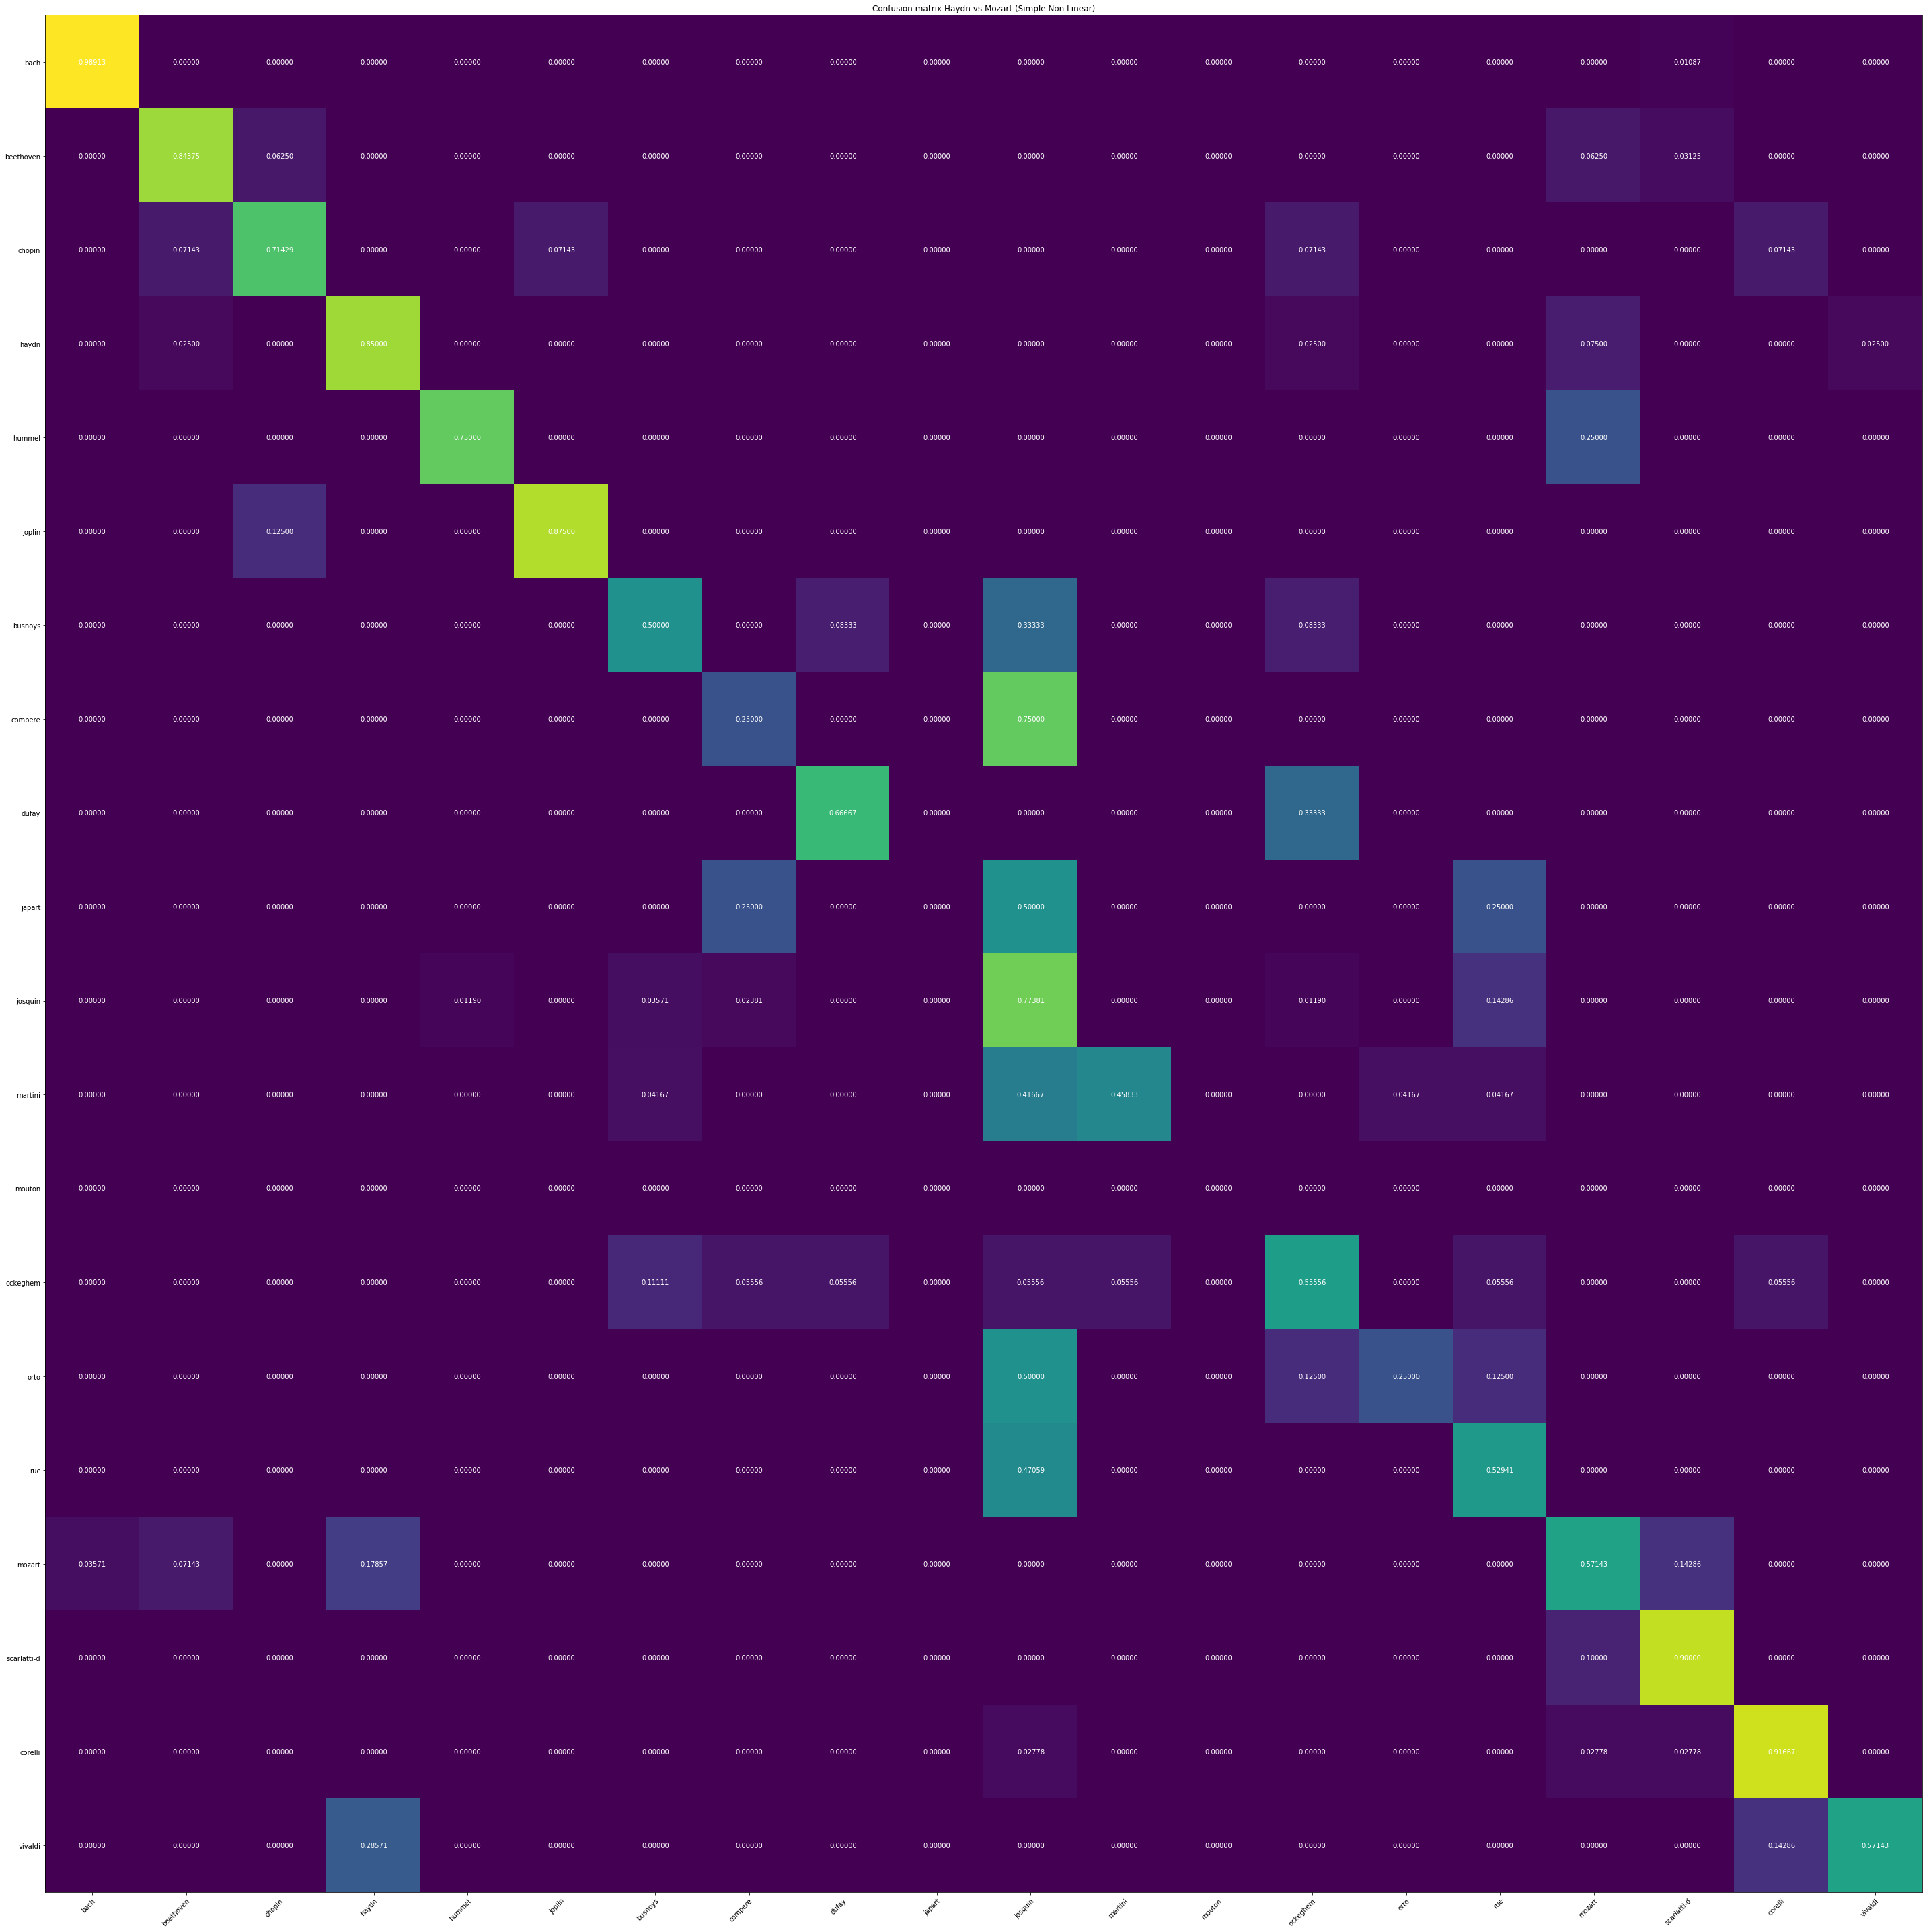

bach 45 / 46 = 0.9782608695652174
beethoven 15 / 16 = 0.9375
busnoys 3 / 6 = 0.5
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 2 / 3 = 0.6666666666666666
haydn 18 / 20 = 0.9
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 36 / 42 = 0.8571428571428571
martini 8 / 12 = 0.6666666666666666
mozart 7 / 14 = 0.5
ockeghem 6 / 9 = 0.6666666666666666
orto 1 / 4 = 0.25
rue 8 / 17 = 0.47058823529411764
scarlatti-d 4 / 5 = 0.8
vivaldi 2 / 4 = 0.5
181 233 0.776824034334764
---------------------------------------------
---------------------------------------------
Fold 2
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (6000)
bias torch.S

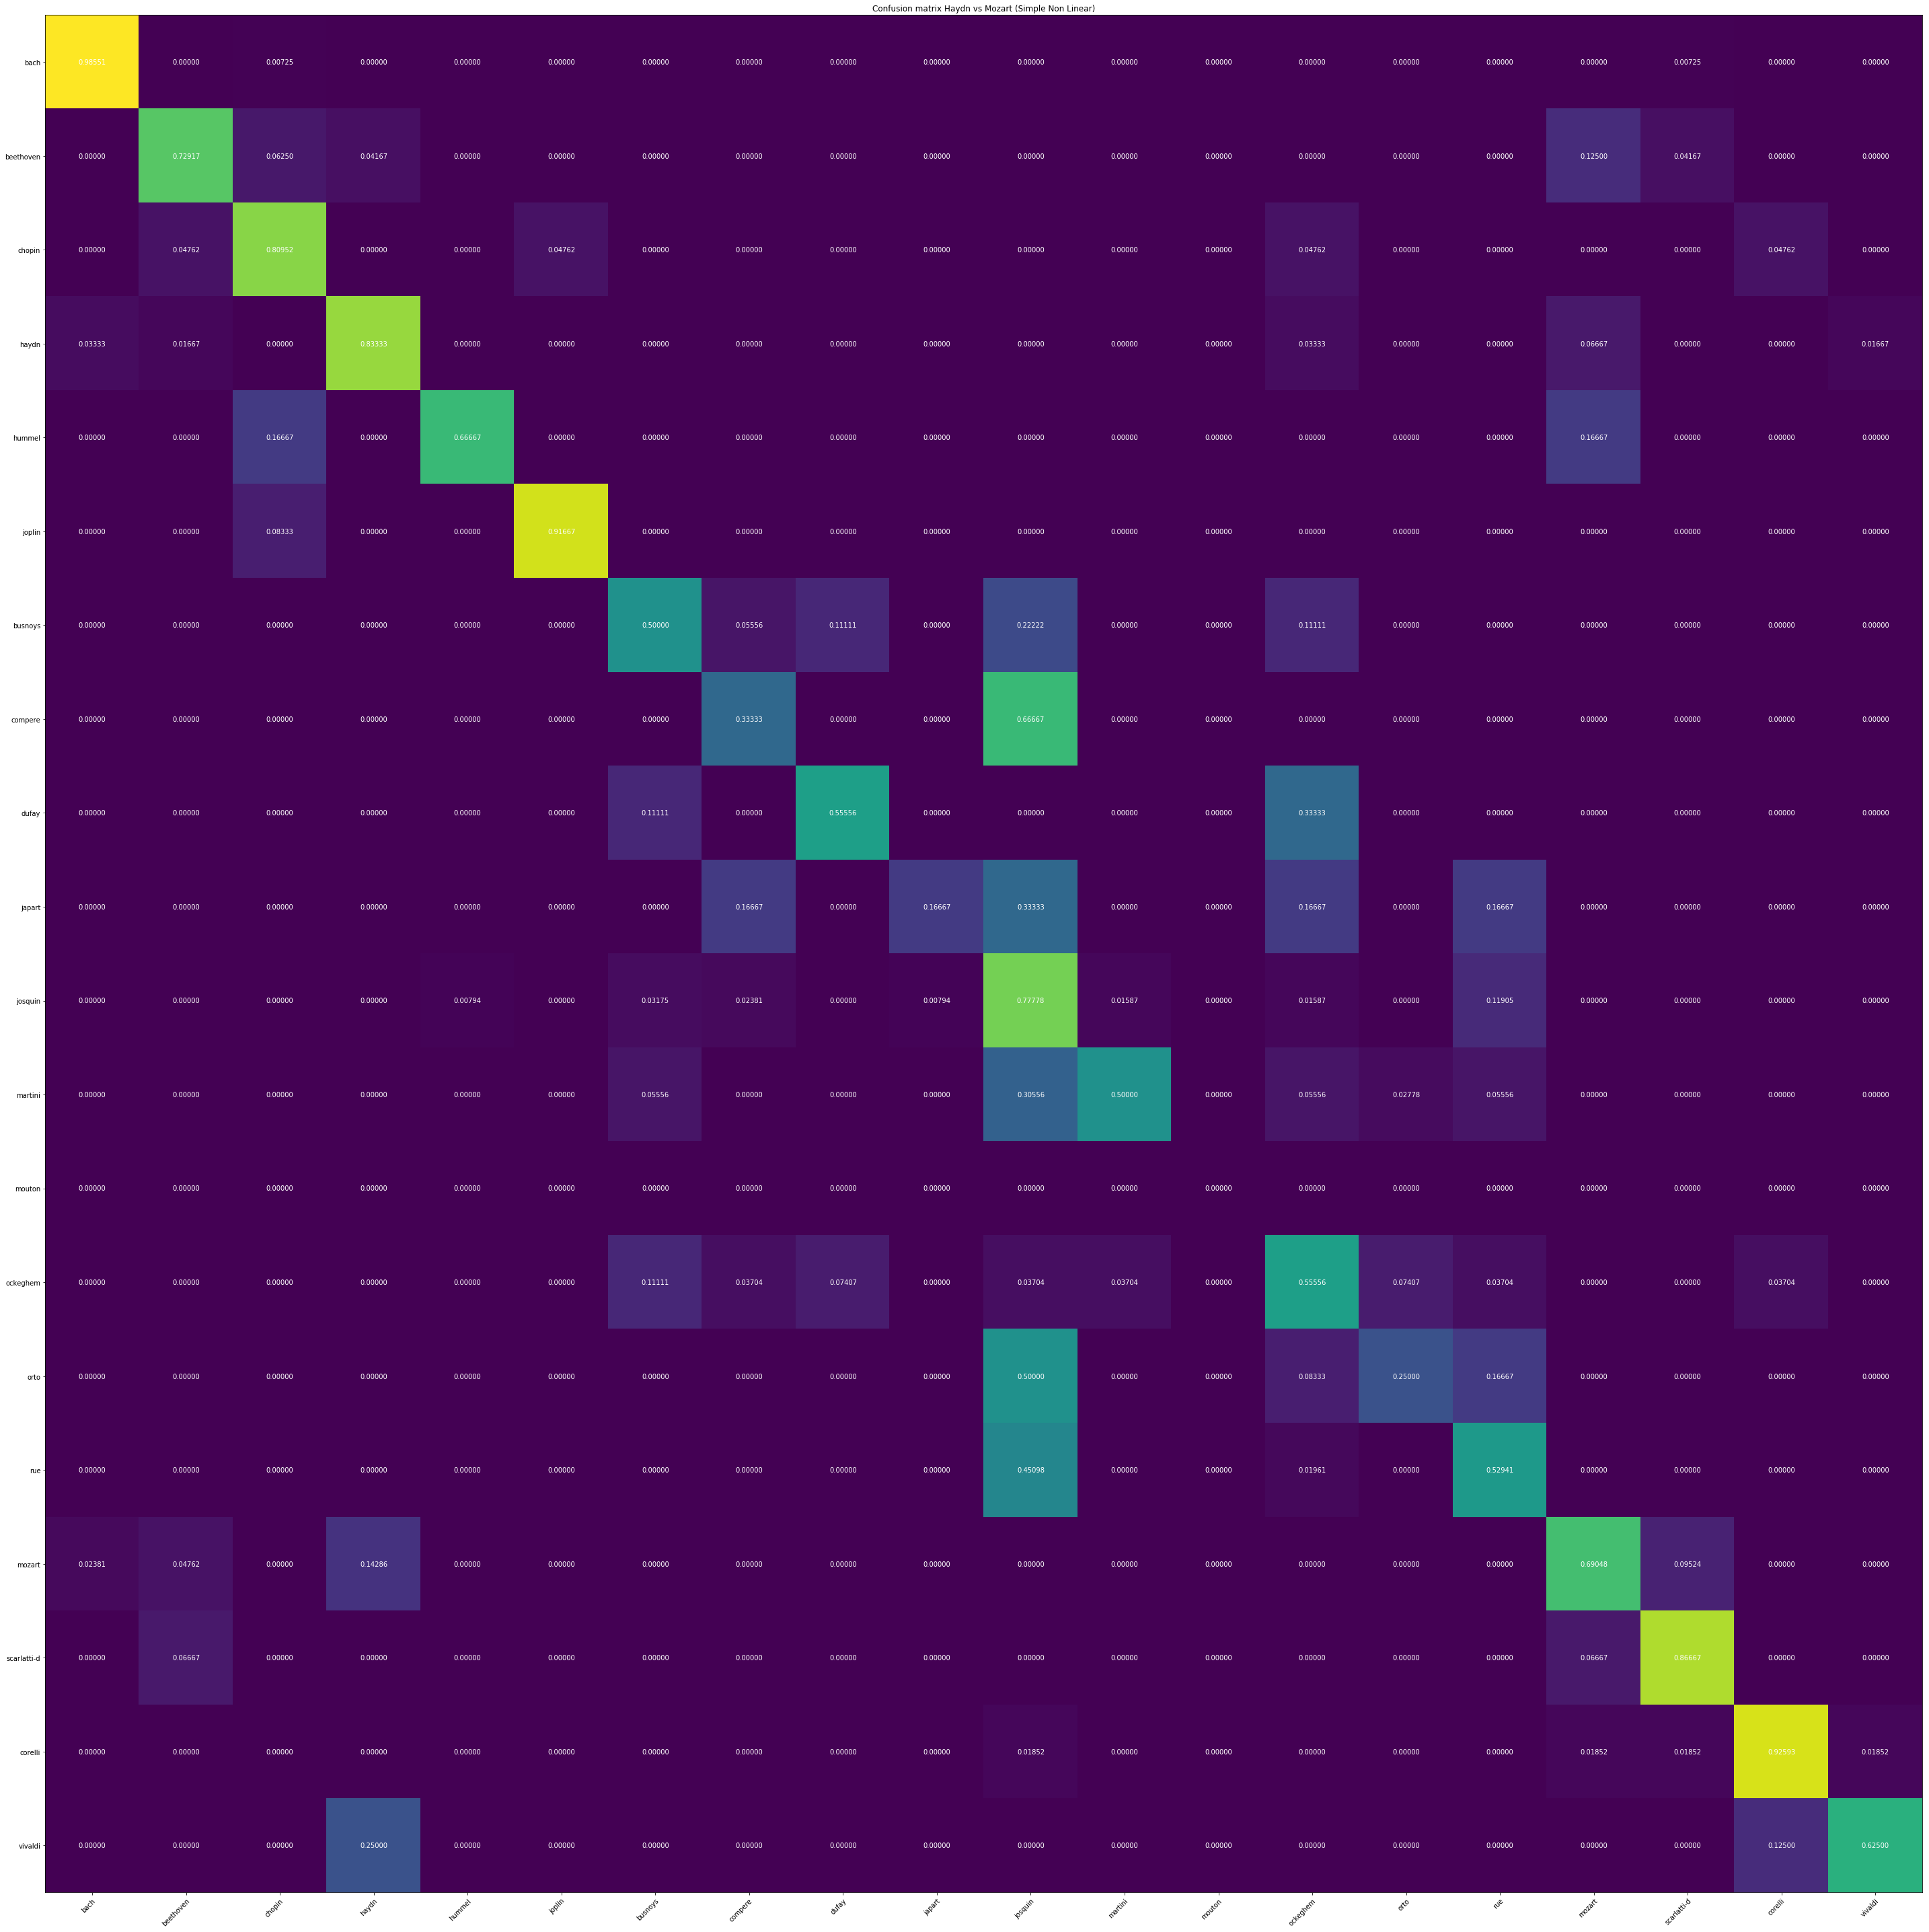

bach 45 / 46 = 0.9782608695652174
beethoven 8 / 16 = 0.5
busnoys 3 / 6 = 0.5
chopin 7 / 7 = 1.0
compere 1 / 2 = 0.5
corelli 17 / 18 = 0.9444444444444444
dufay 1 / 3 = 0.3333333333333333
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 1 / 2 = 0.5
joplin 4 / 4 = 1.0
josquin 33 / 42 = 0.7857142857142857
martini 7 / 12 = 0.5833333333333334
mozart 13 / 14 = 0.9285714285714286
ockeghem 5 / 9 = 0.5555555555555556
orto 1 / 4 = 0.25
rue 9 / 17 = 0.5294117647058824
scarlatti-d 4 / 5 = 0.8
vivaldi 1 / 1 = 1.0
177 230 0.7695652173913043
---------------------------------------------
---------------------------------------------
Fold 3
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (6000)
bias torch.Size

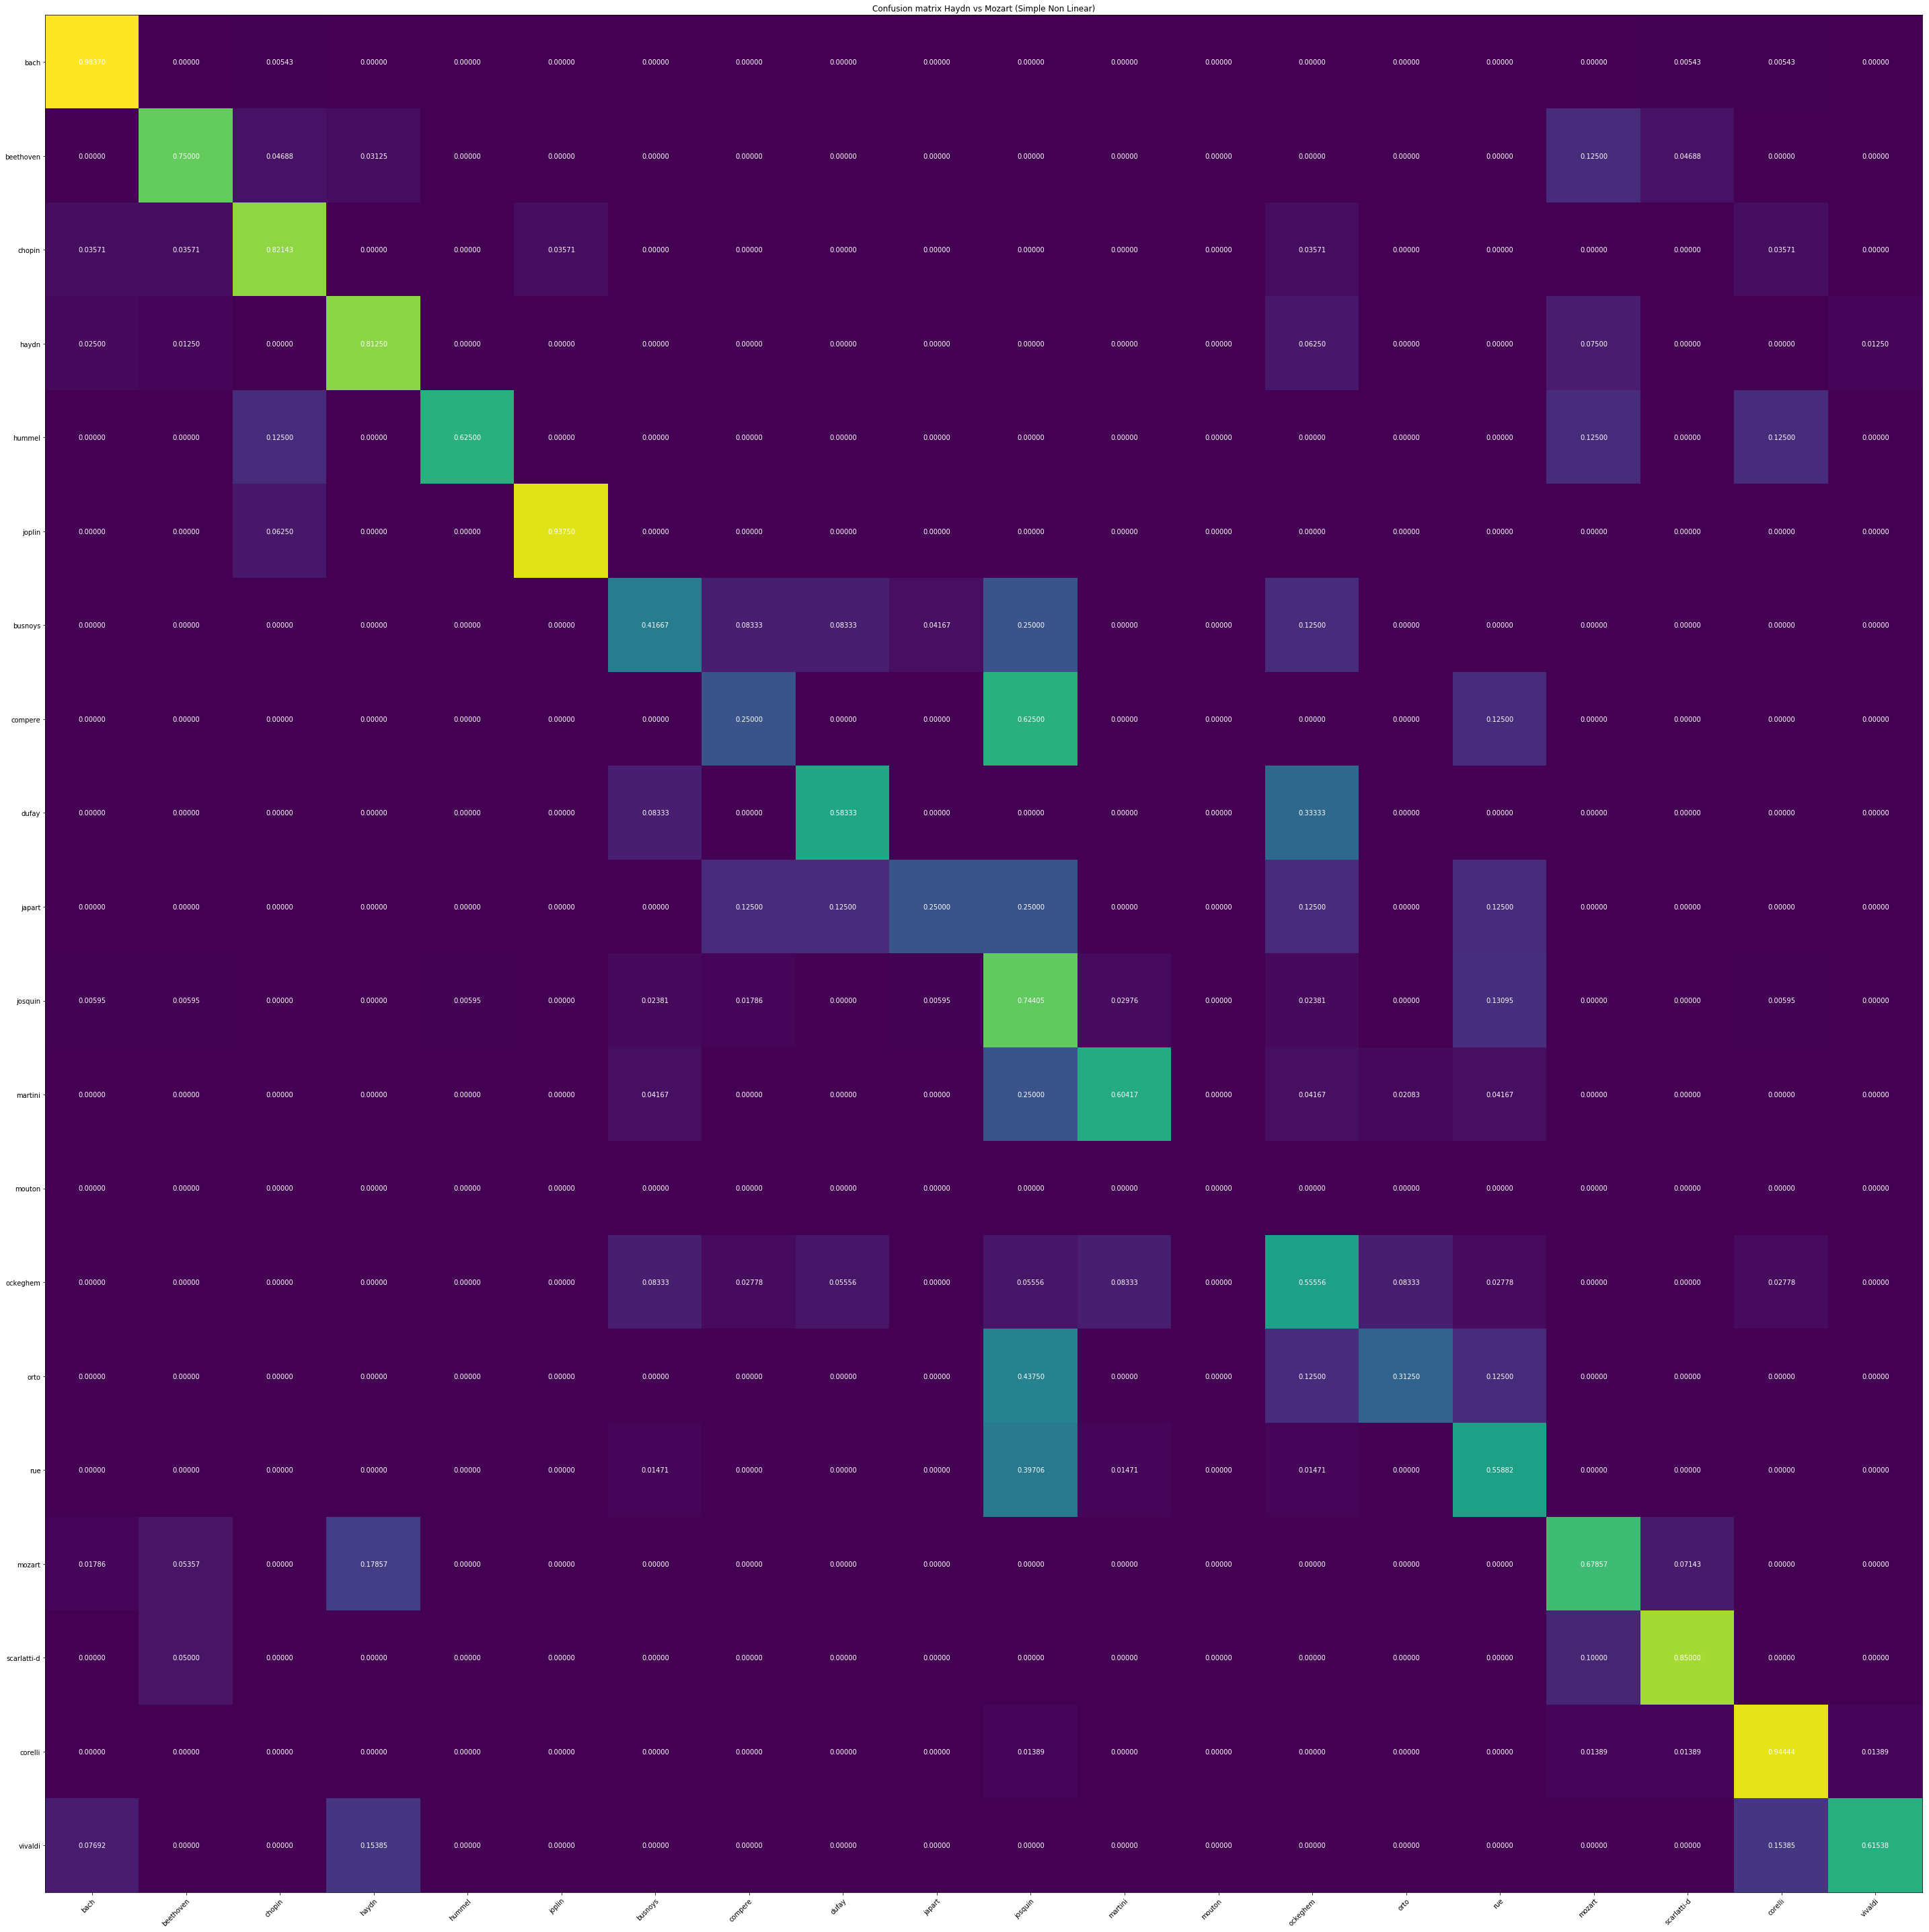

bach 45 / 46 = 0.9782608695652174
beethoven 13 / 16 = 0.8125
busnoys 1 / 6 = 0.16666666666666666
chopin 6 / 7 = 0.8571428571428571
compere 0 / 2 = 0.0
corelli 18 / 18 = 1.0
dufay 2 / 3 = 0.6666666666666666
haydn 15 / 20 = 0.75
hummel 1 / 2 = 0.5
japart 1 / 2 = 0.5
joplin 4 / 4 = 1.0
josquin 27 / 42 = 0.6428571428571429
martini 11 / 12 = 0.9166666666666666
mozart 9 / 14 = 0.6428571428571429
ockeghem 5 / 9 = 0.5555555555555556
orto 2 / 4 = 0.5
rue 11 / 17 = 0.6470588235294118
scarlatti-d 4 / 5 = 0.8
vivaldi 3 / 5 = 0.6
178 234 0.7606837606837606
---------------------------------------------
---------------------------------------------
Fold 4
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (

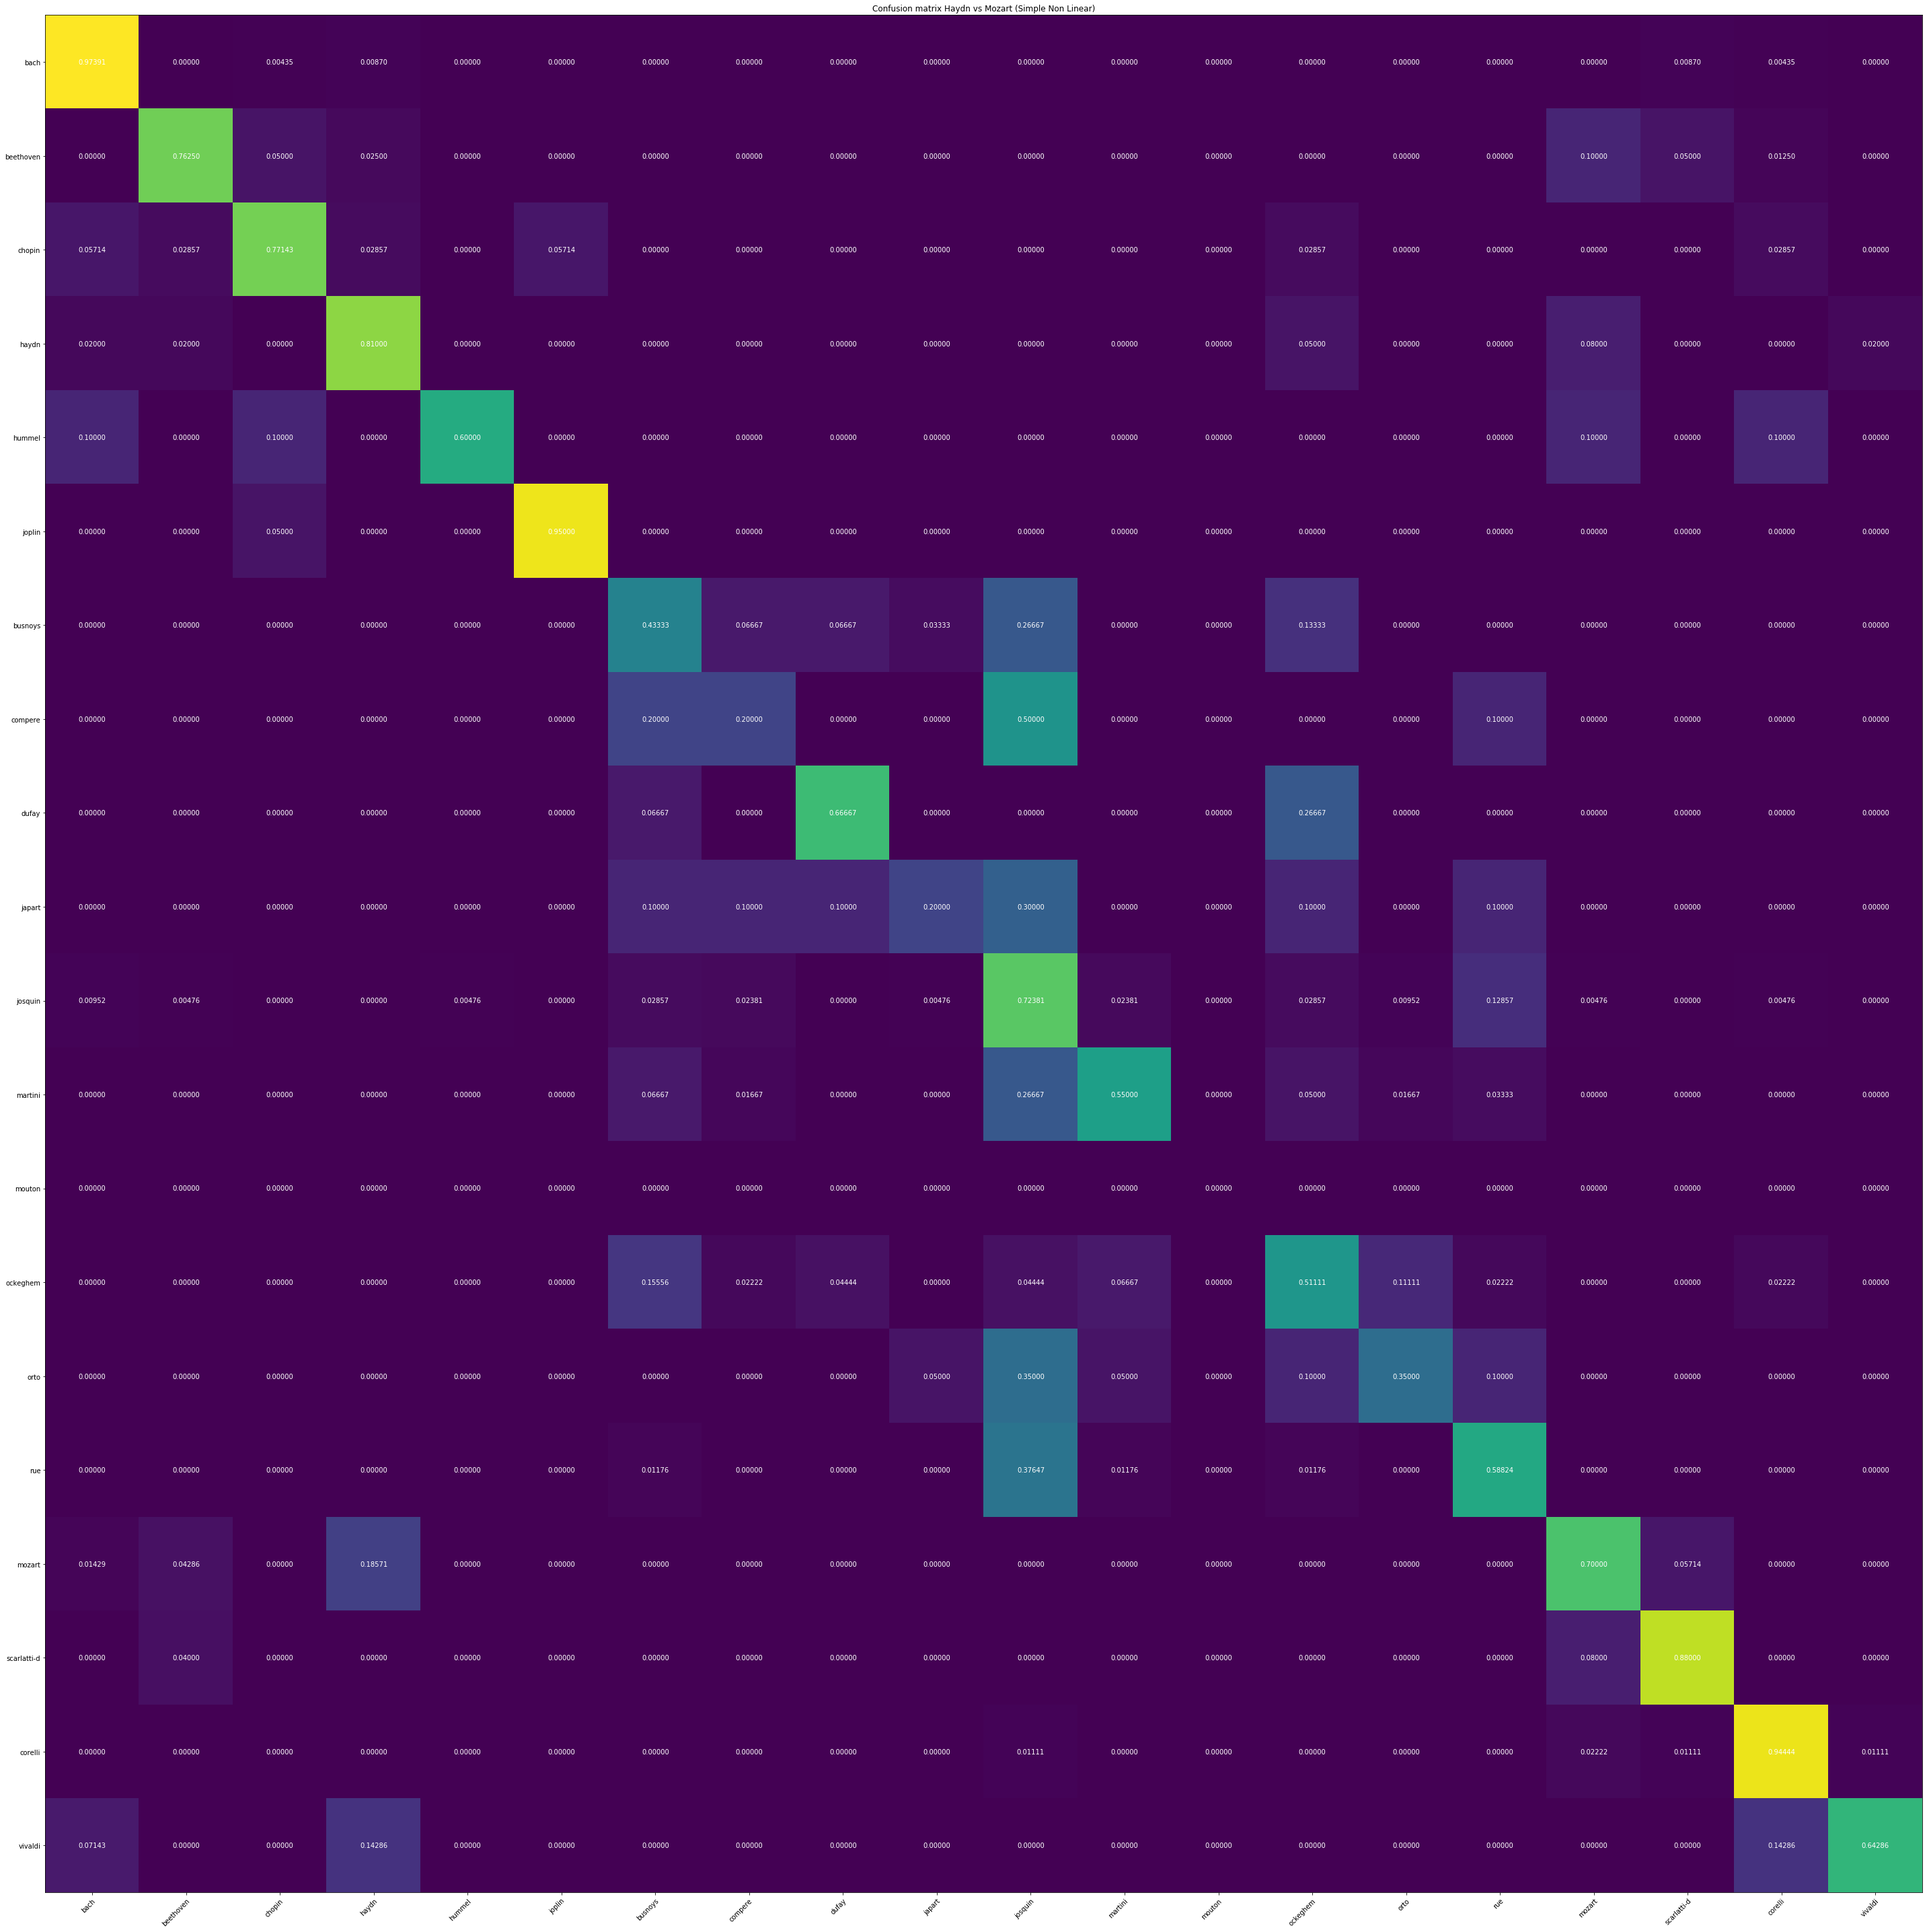

bach 43 / 46 = 0.9347826086956522
beethoven 13 / 16 = 0.8125
busnoys 3 / 6 = 0.5
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 27 / 42 = 0.6428571428571429
martini 4 / 12 = 0.3333333333333333
mozart 11 / 14 = 0.7857142857142857
ockeghem 3 / 9 = 0.3333333333333333
orto 2 / 4 = 0.5
rue 12 / 17 = 0.7058823529411765
scarlatti-d 5 / 5 = 1.0
vivaldi 1 / 1 = 1.0
169 230 0.7347826086956522
---------------------------------------------
---------------------------------------------
Fold 5
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (6000)
bias torch.

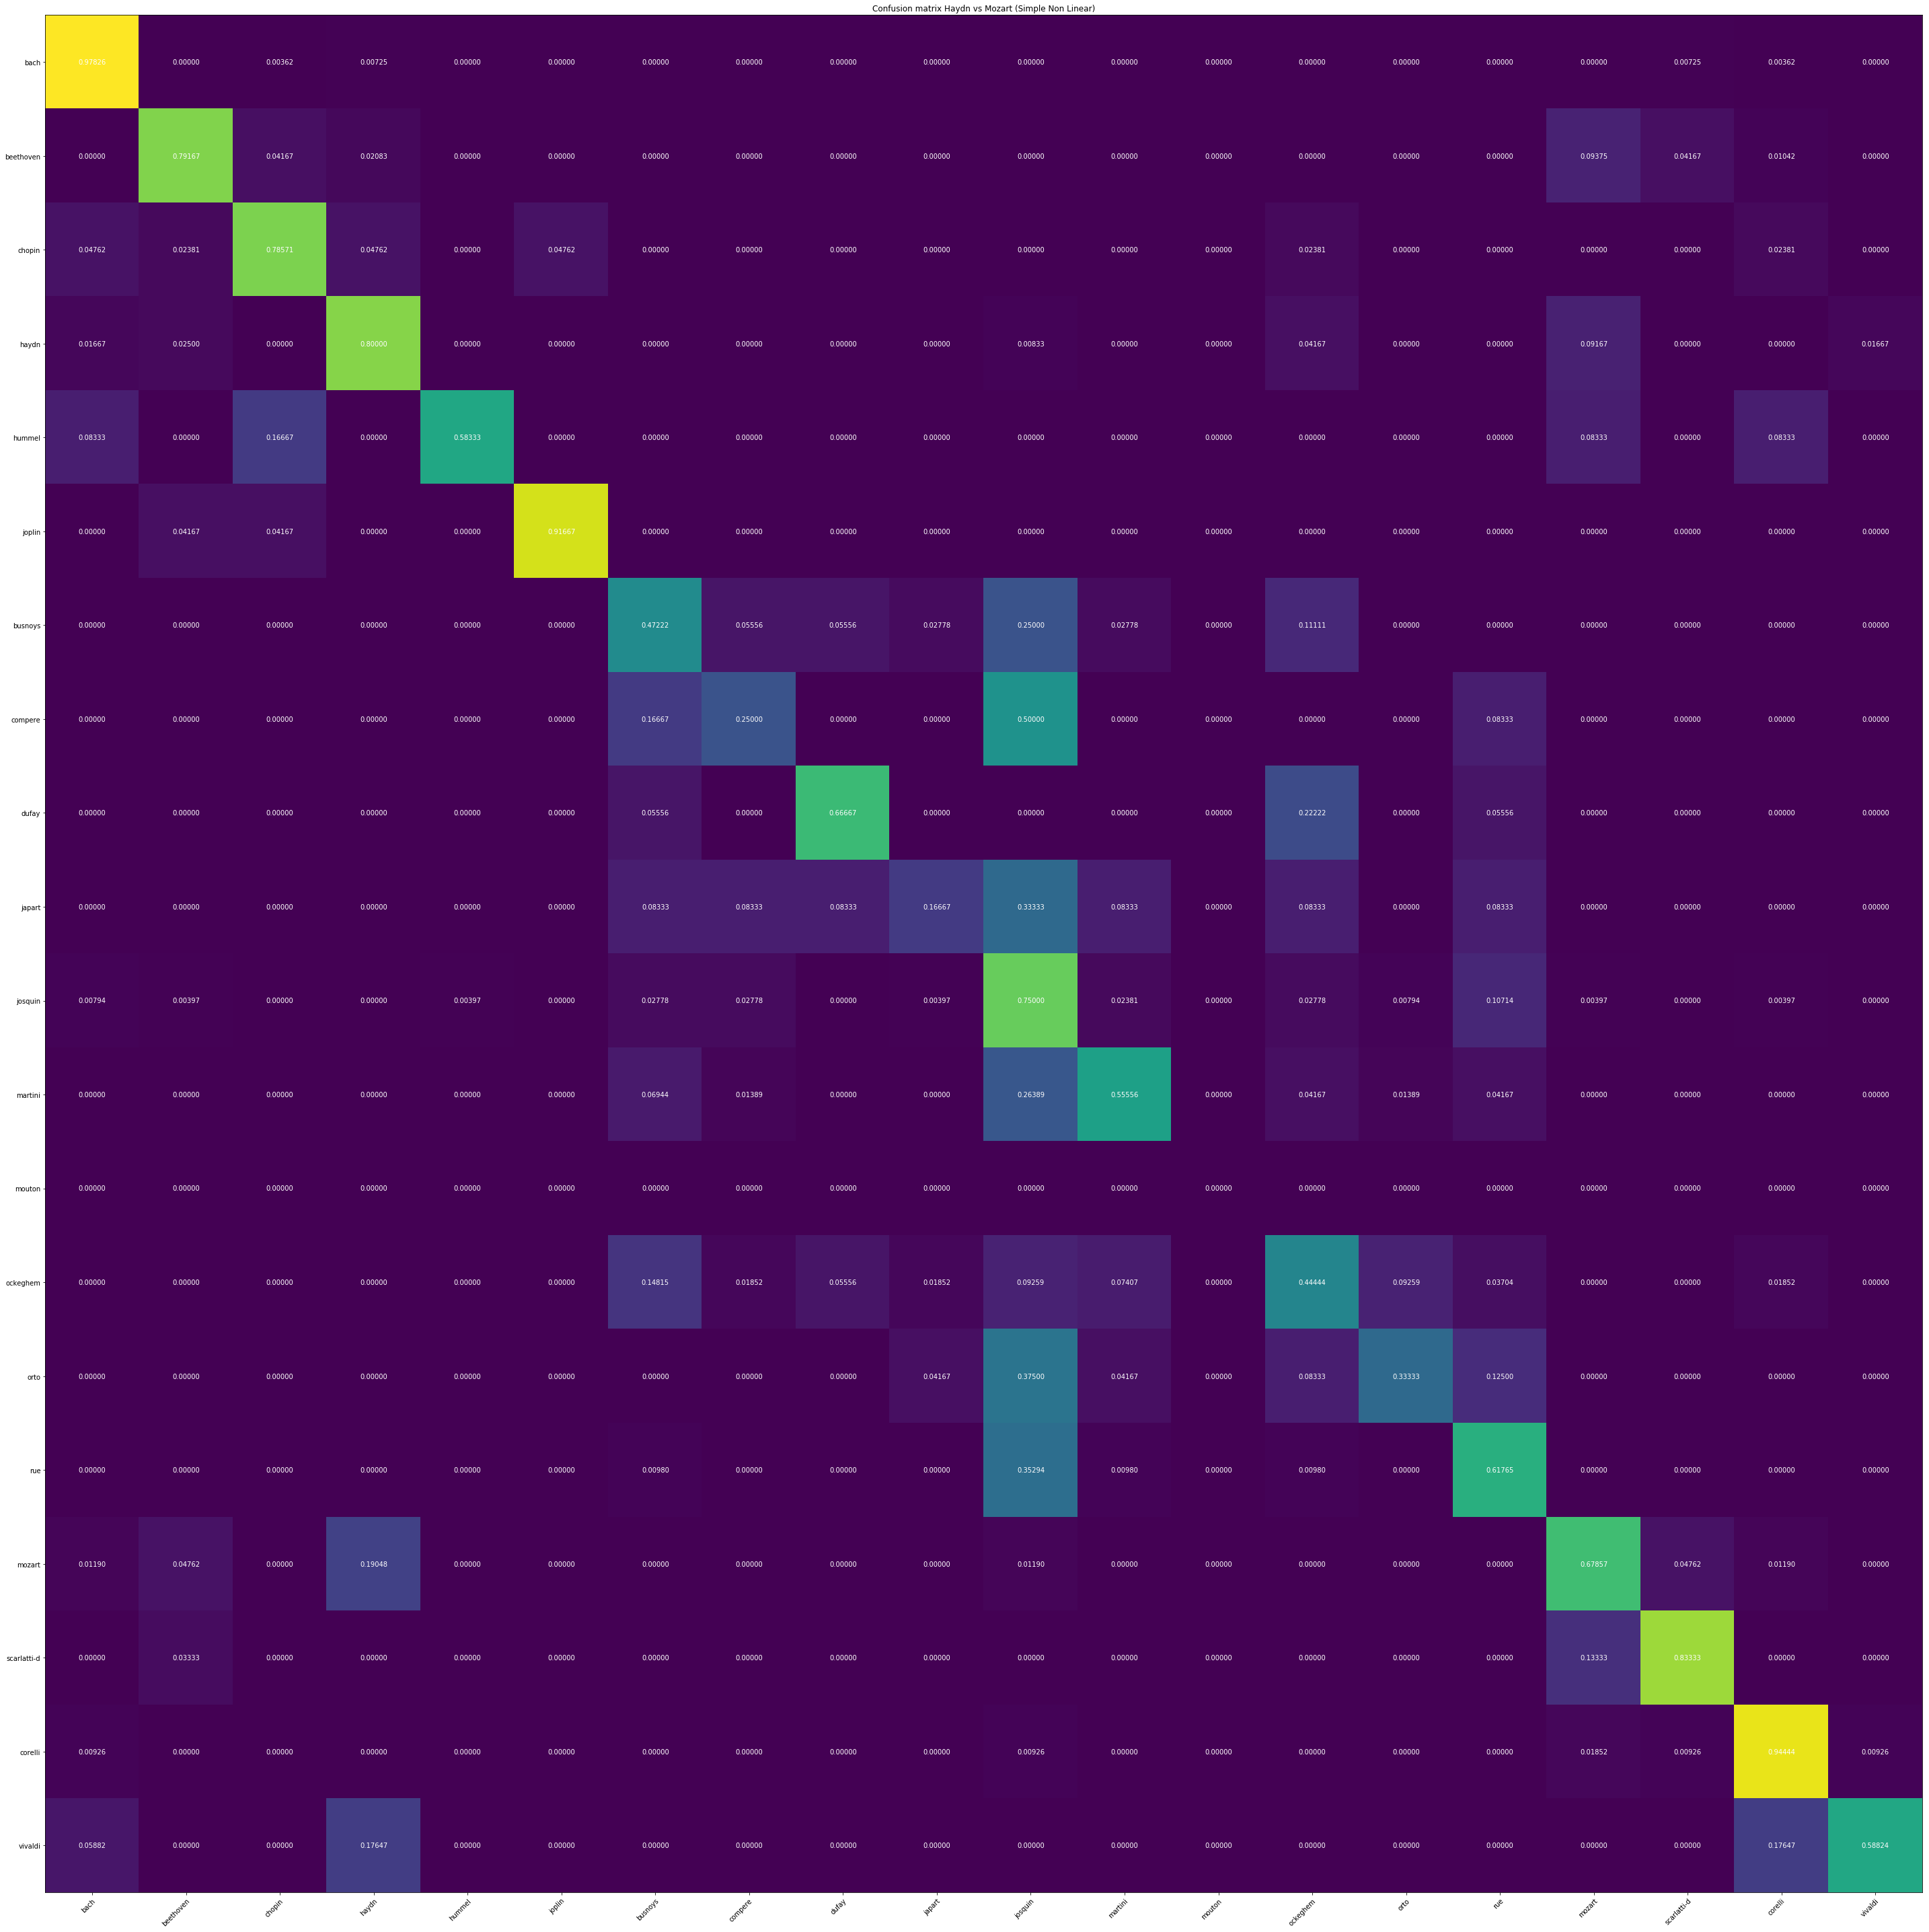

bach 46 / 46 = 1.0
beethoven 15 / 16 = 0.9375
busnoys 4 / 6 = 0.6666666666666666
chopin 6 / 7 = 0.8571428571428571
compere 1 / 2 = 0.5
corelli 17 / 18 = 0.9444444444444444
dufay 2 / 3 = 0.6666666666666666
haydn 15 / 20 = 0.75
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 37 / 42 = 0.8809523809523809
martini 7 / 12 = 0.5833333333333334
mozart 8 / 14 = 0.5714285714285714
ockeghem 1 / 9 = 0.1111111111111111
orto 1 / 4 = 0.25
rue 13 / 17 = 0.7647058823529411
scarlatti-d 3 / 5 = 0.6
vivaldi 1 / 3 = 0.3333333333333333
181 232 0.7801724137931034
---------------------------------------------
---------------------------------------------
Fold 6
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Si

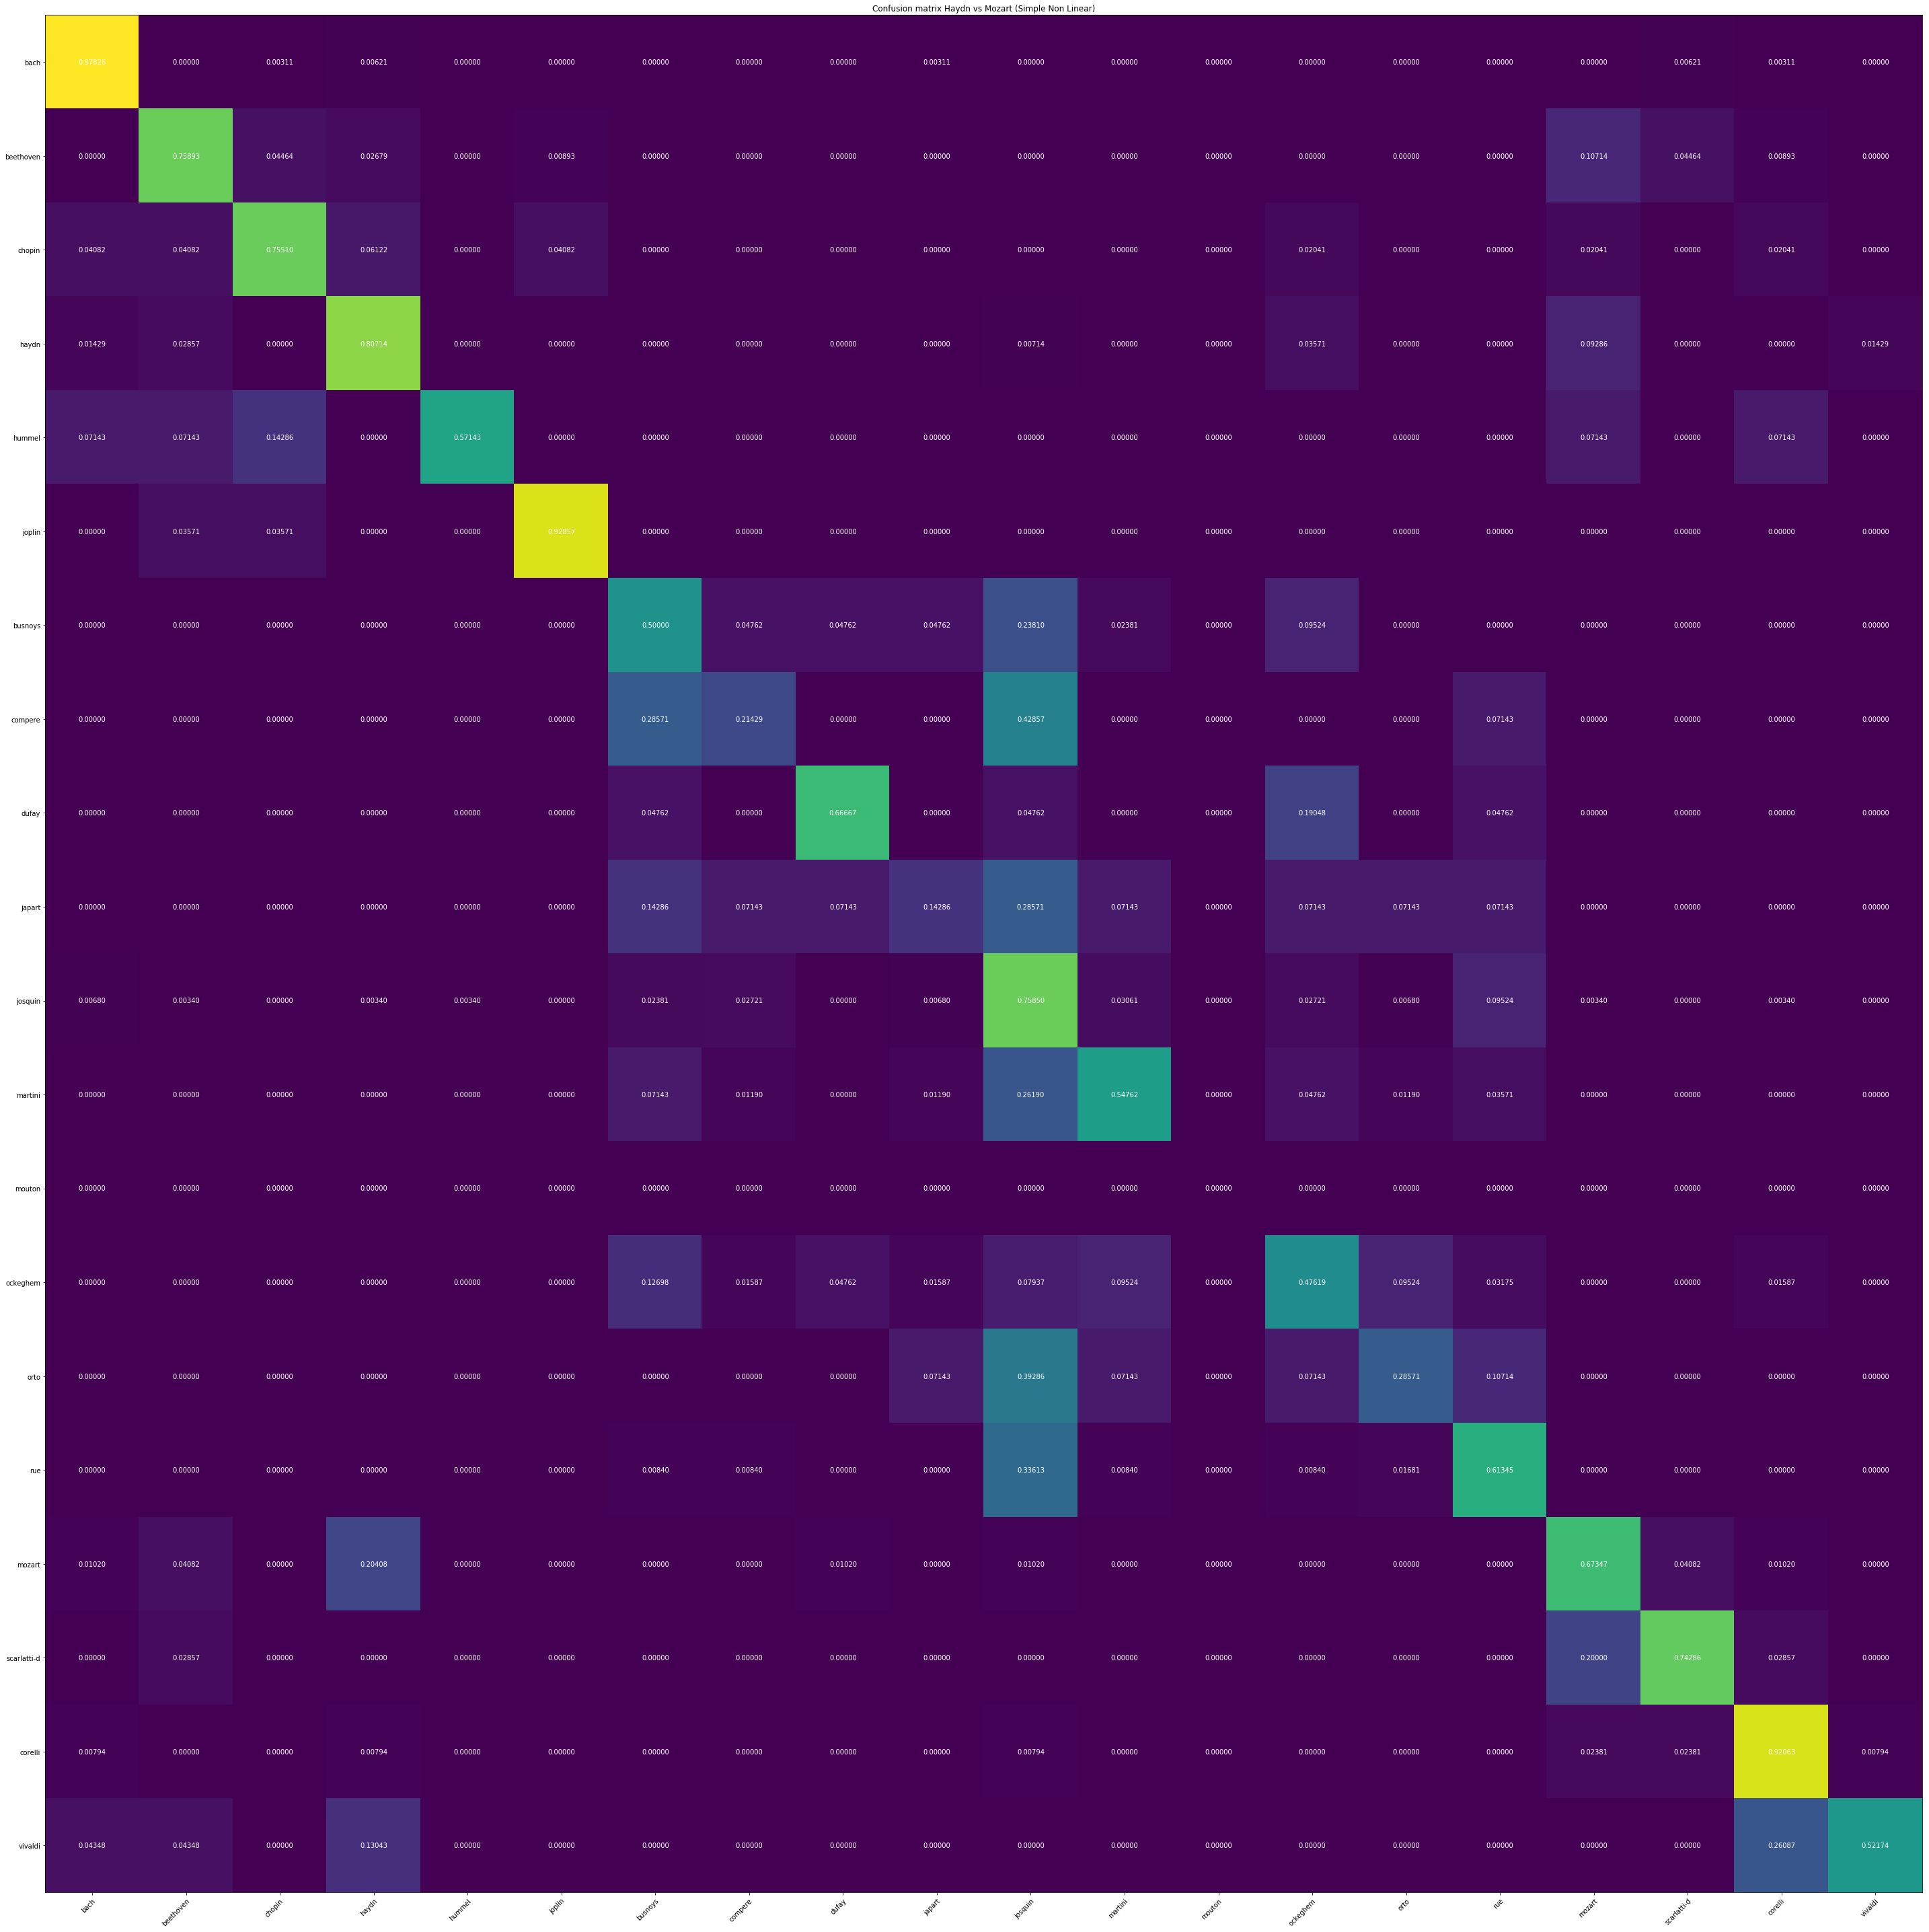

bach 45 / 46 = 0.9782608695652174
beethoven 9 / 16 = 0.5625
busnoys 4 / 6 = 0.6666666666666666
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 14 / 18 = 0.7777777777777778
dufay 2 / 3 = 0.6666666666666666
haydn 17 / 20 = 0.85
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 34 / 42 = 0.8095238095238095
martini 6 / 12 = 0.5
mozart 9 / 14 = 0.6428571428571429
ockeghem 6 / 9 = 0.6666666666666666
orto 0 / 4 = 0.0
rue 10 / 17 = 0.5882352941176471
scarlatti-d 1 / 5 = 0.2
vivaldi 2 / 6 = 0.3333333333333333
168 235 0.7148936170212766
---------------------------------------------
---------------------------------------------
Fold 7
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size(

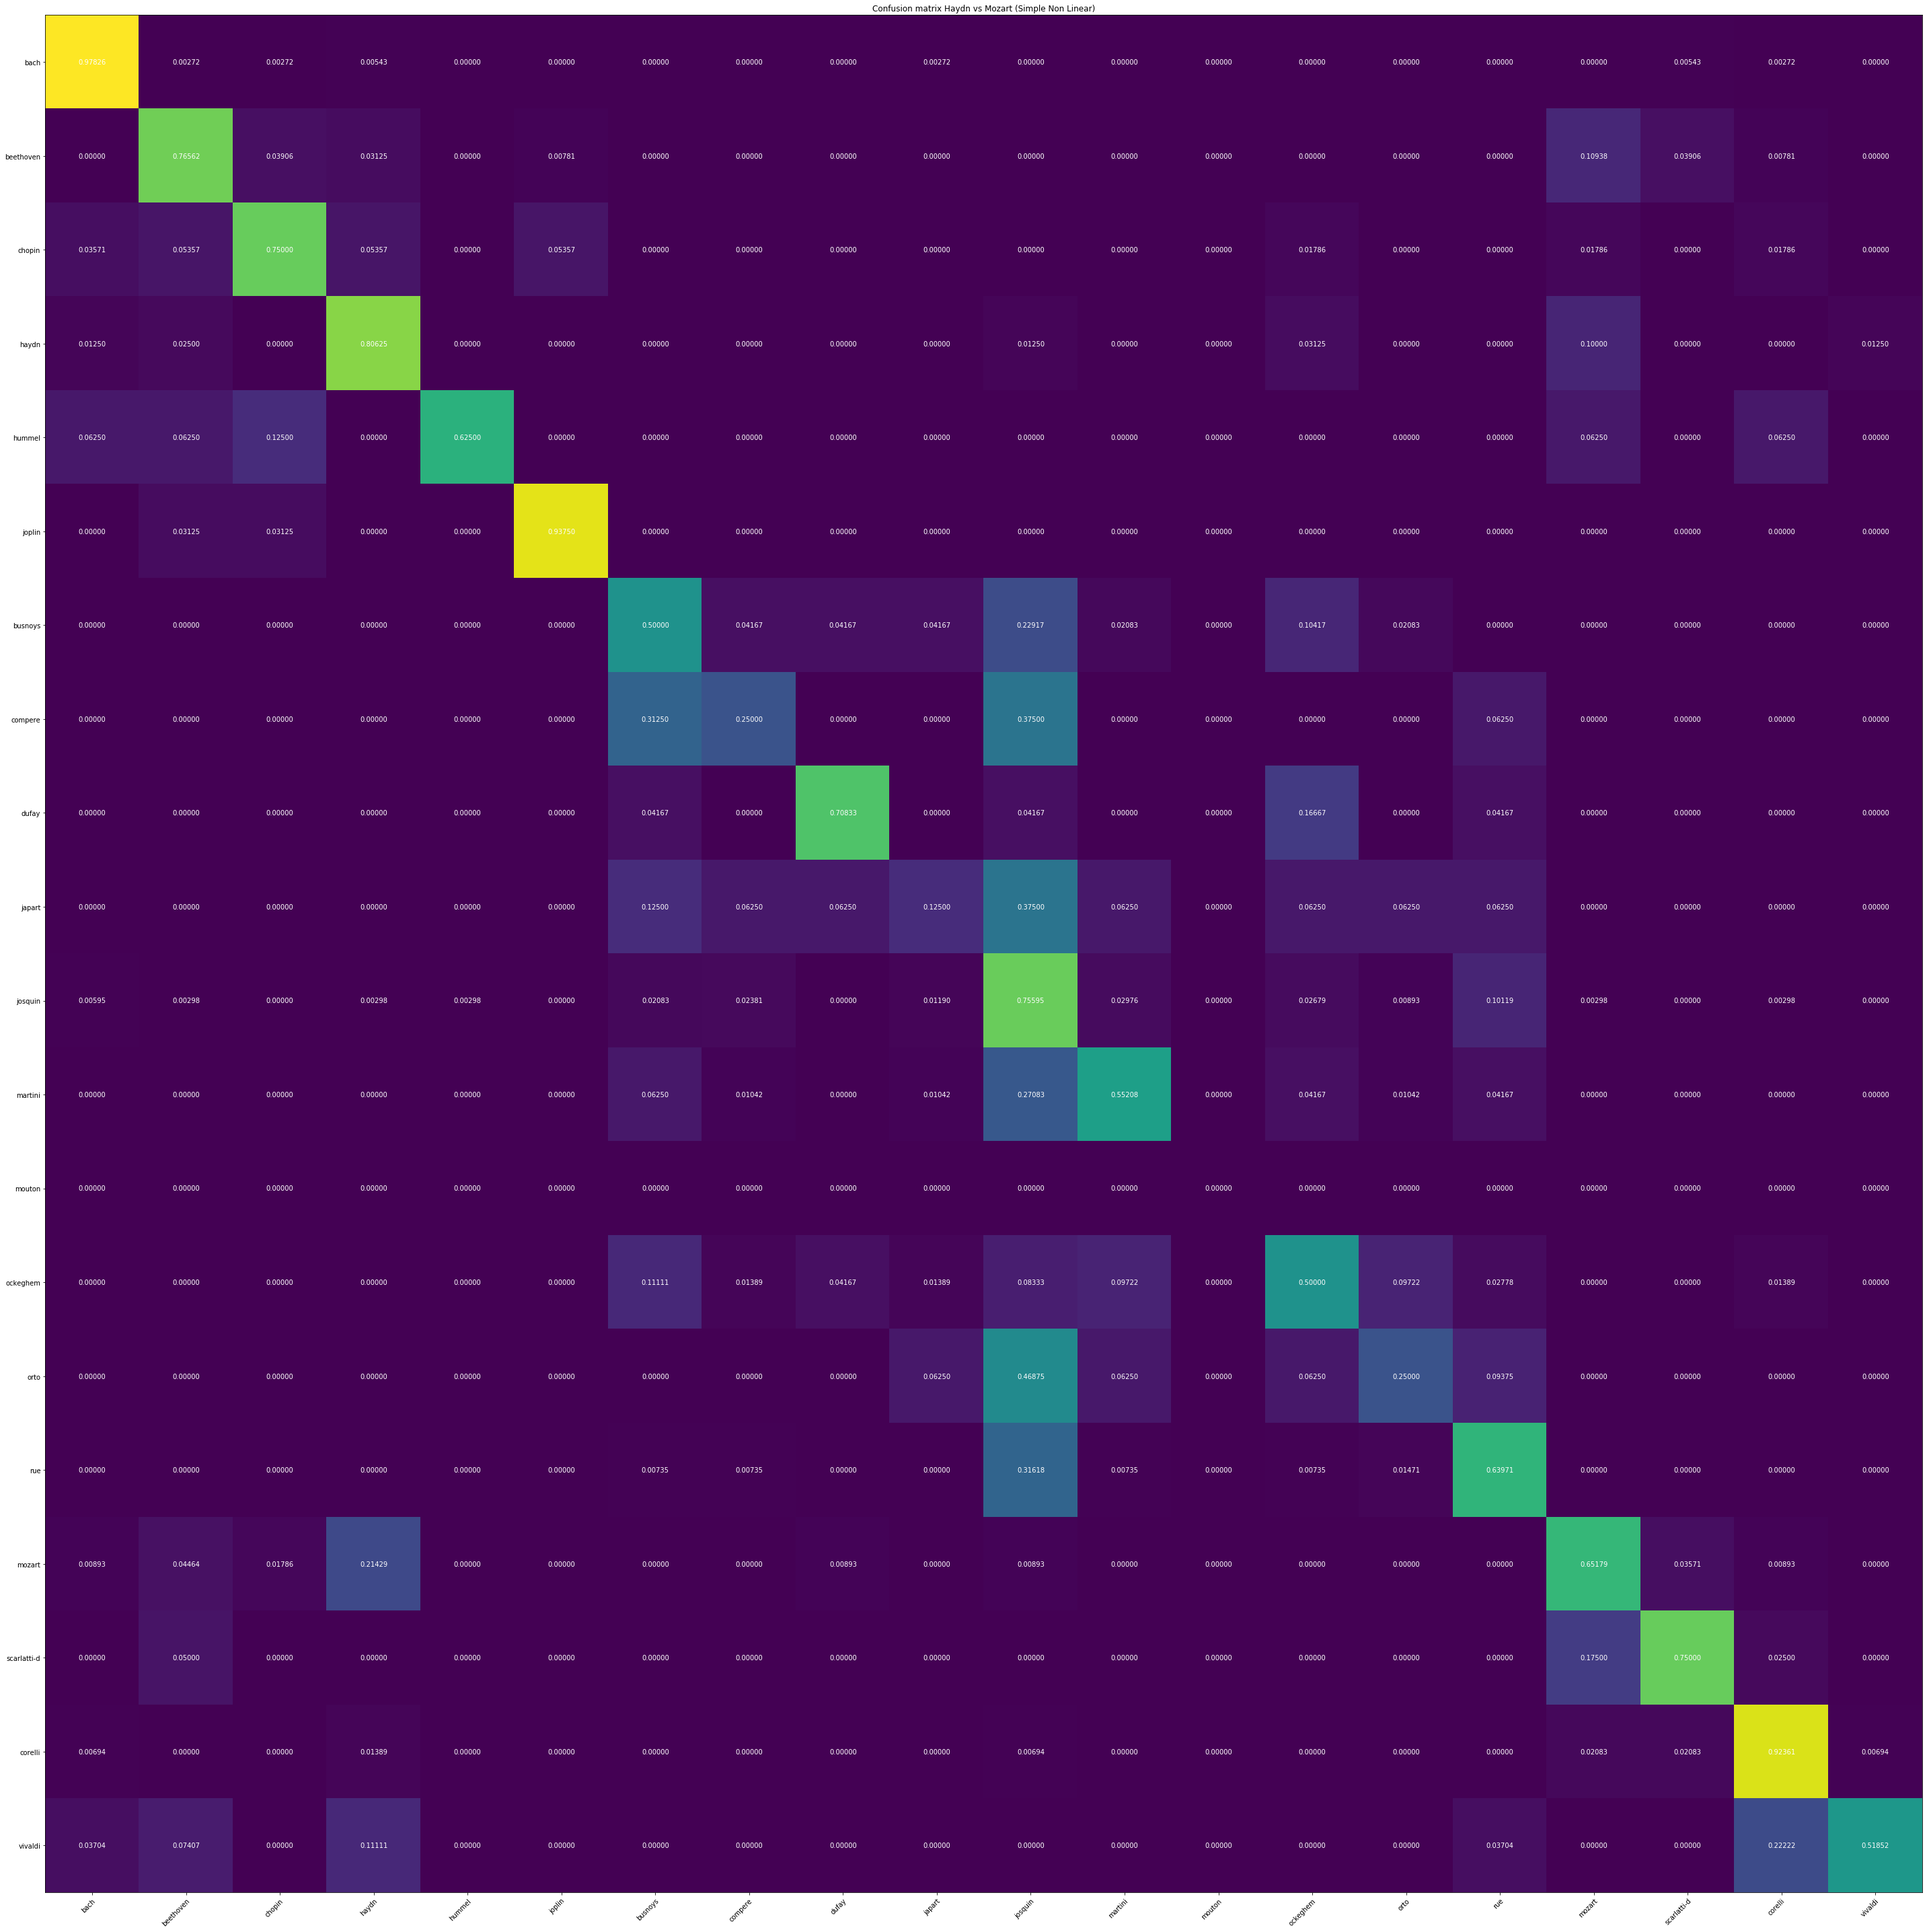

bach 45 / 46 = 0.9782608695652174
beethoven 13 / 16 = 0.8125
busnoys 3 / 6 = 0.5
chopin 5 / 7 = 0.7142857142857143
compere 1 / 2 = 0.5
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 16 / 20 = 0.8
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 31 / 42 = 0.7380952380952381
martini 7 / 12 = 0.5833333333333334
mozart 7 / 14 = 0.5
ockeghem 6 / 9 = 0.6666666666666666
orto 0 / 4 = 0.0
rue 14 / 17 = 0.8235294117647058
scarlatti-d 4 / 5 = 0.8
vivaldi 2 / 4 = 0.5
180 233 0.7725321888412017
---------------------------------------------
---------------------------------------------
Fold 8
len validation_ids 400
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (6000)
bias torch.Size([20]) (20)


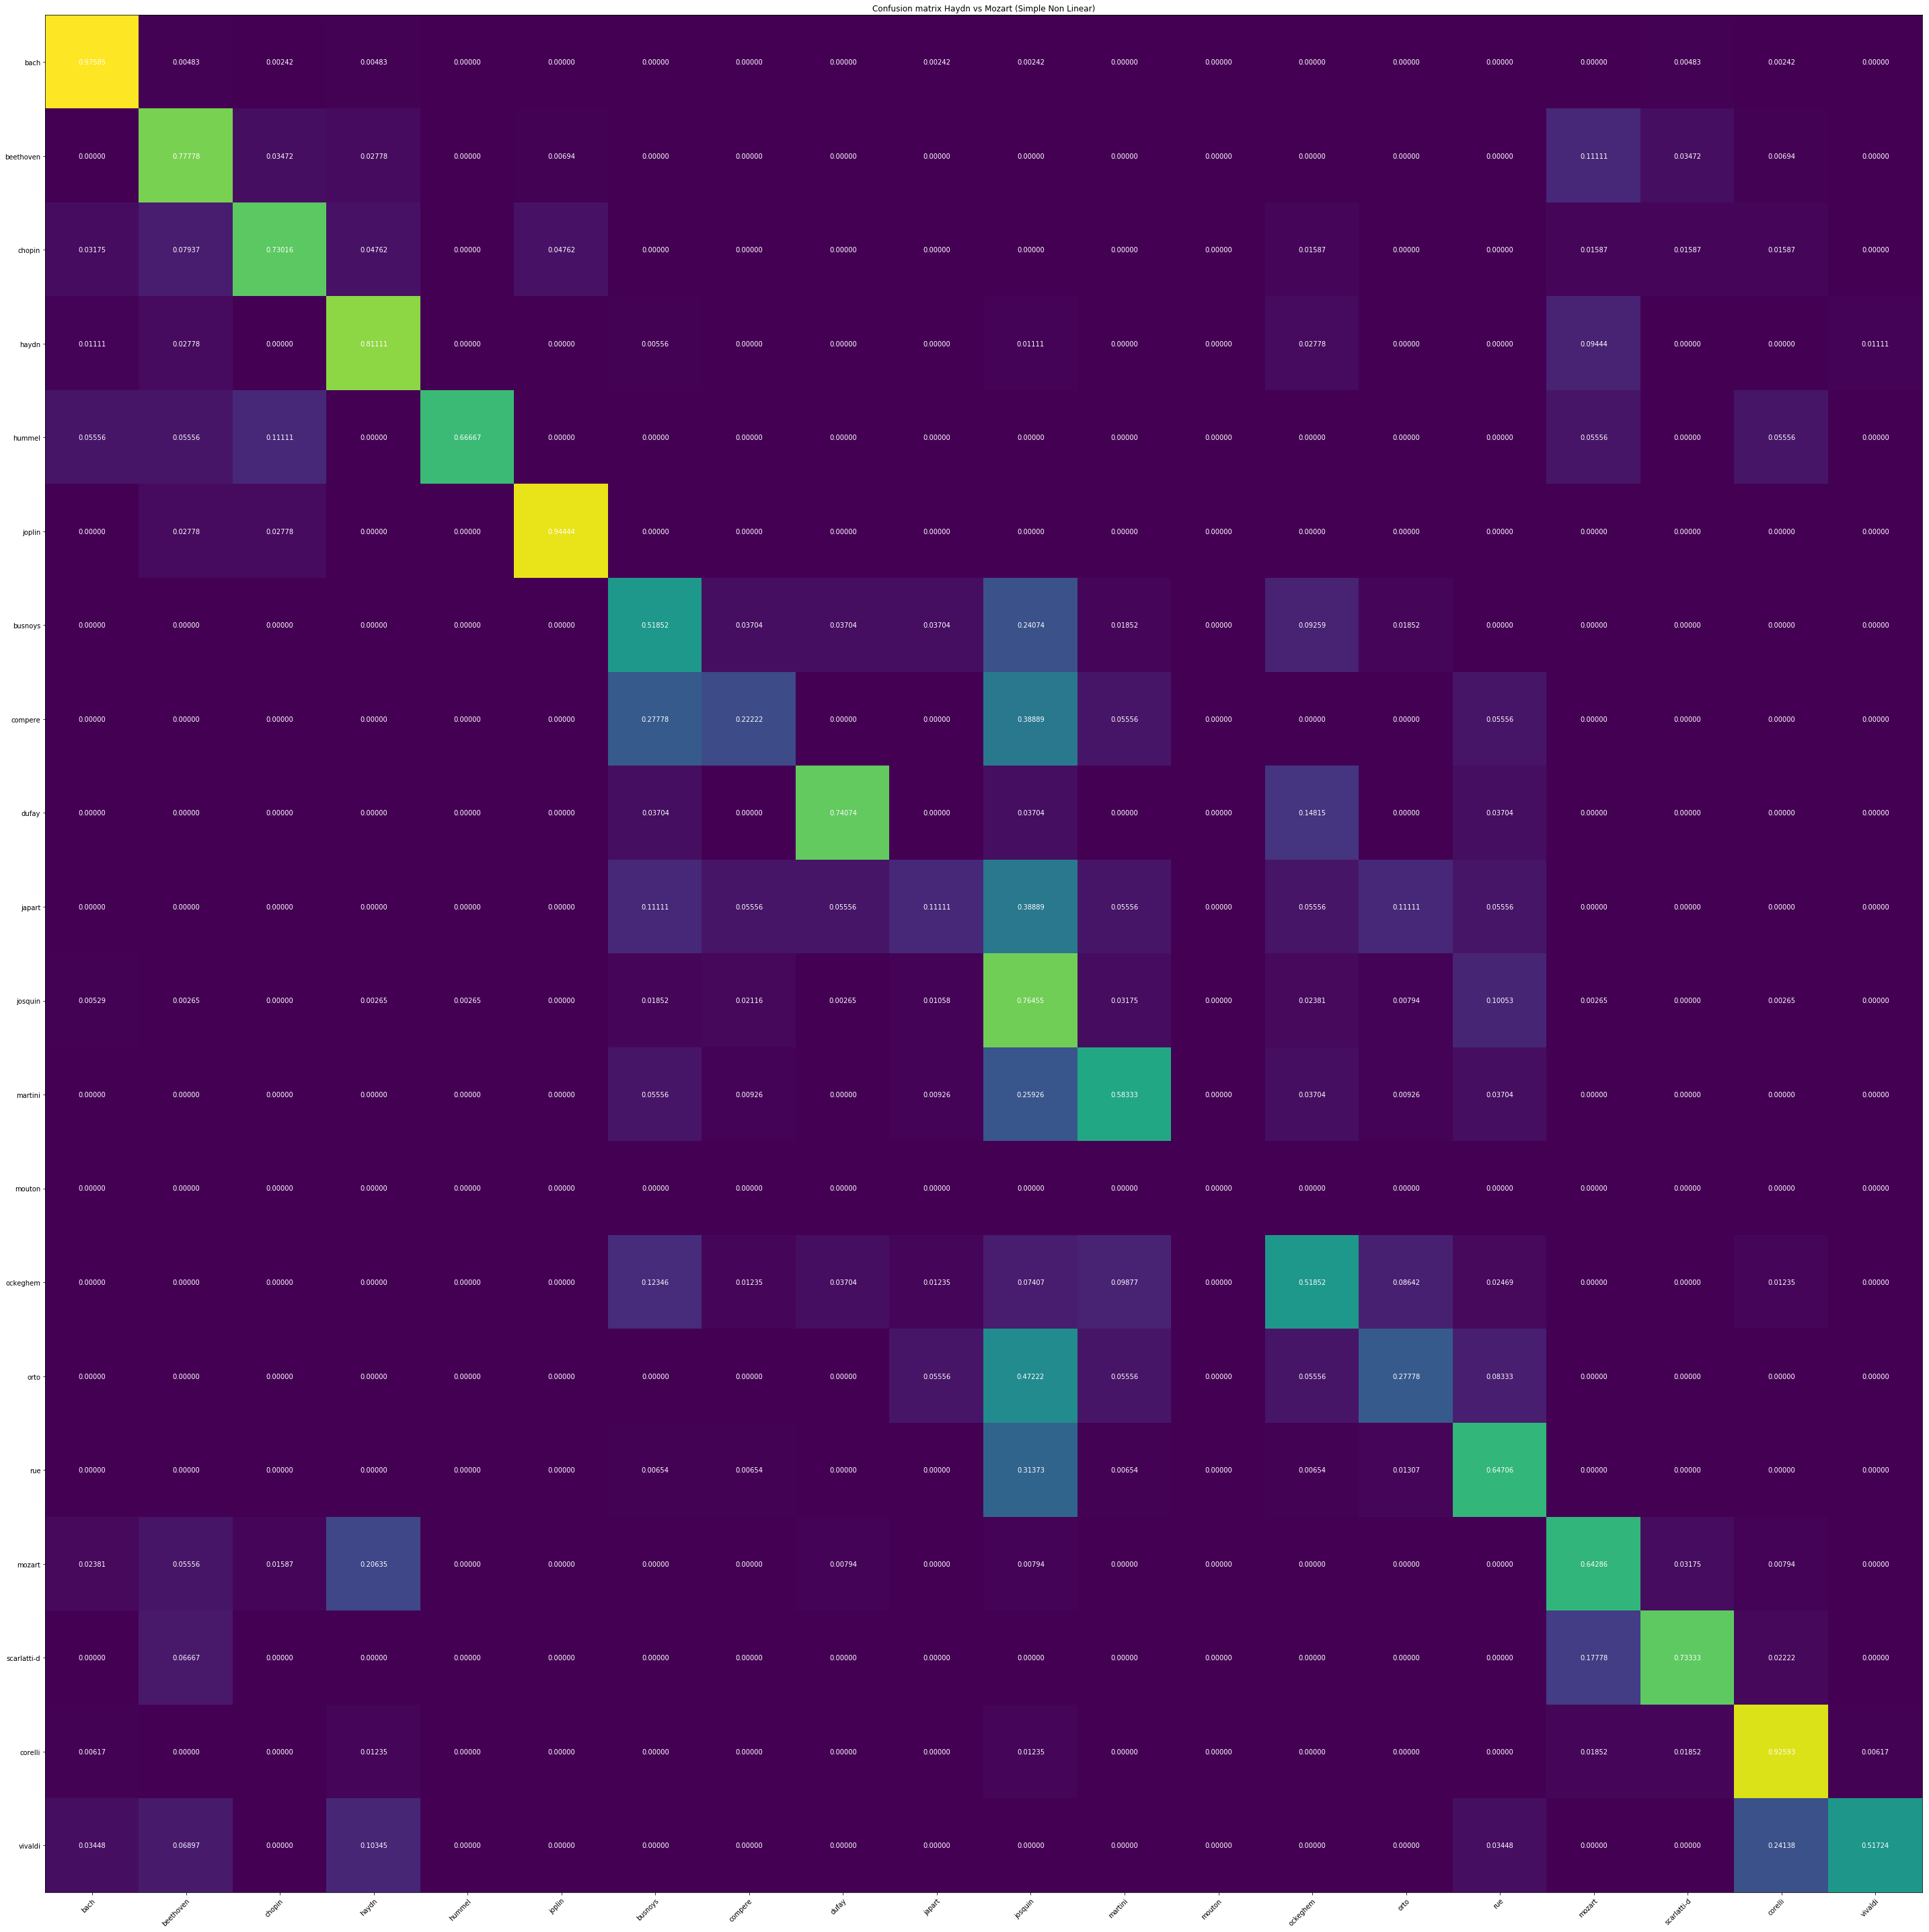

bach 44 / 46 = 0.9565217391304348
beethoven 14 / 16 = 0.875
busnoys 4 / 6 = 0.6666666666666666
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 17 / 20 = 0.85
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 35 / 42 = 0.8333333333333334
martini 10 / 12 = 0.8333333333333334
mozart 8 / 14 = 0.5714285714285714
ockeghem 6 / 9 = 0.6666666666666666
orto 2 / 4 = 0.5
rue 12 / 17 = 0.7058823529411765
scarlatti-d 3 / 5 = 0.6
vivaldi 1 / 2 = 0.5
186 231 0.8051948051948052
---------------------------------------------
---------------------------------------------
Fold 9
len validation_ids 246
len test_ids 400
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([300, 468, 2]) (280800)
wdurations torch.Size([300, 330, 2]) (198000)
w2 torch.Size([300, 300, 2]) (180000)
w3 torch.Size([300, 20]) (60

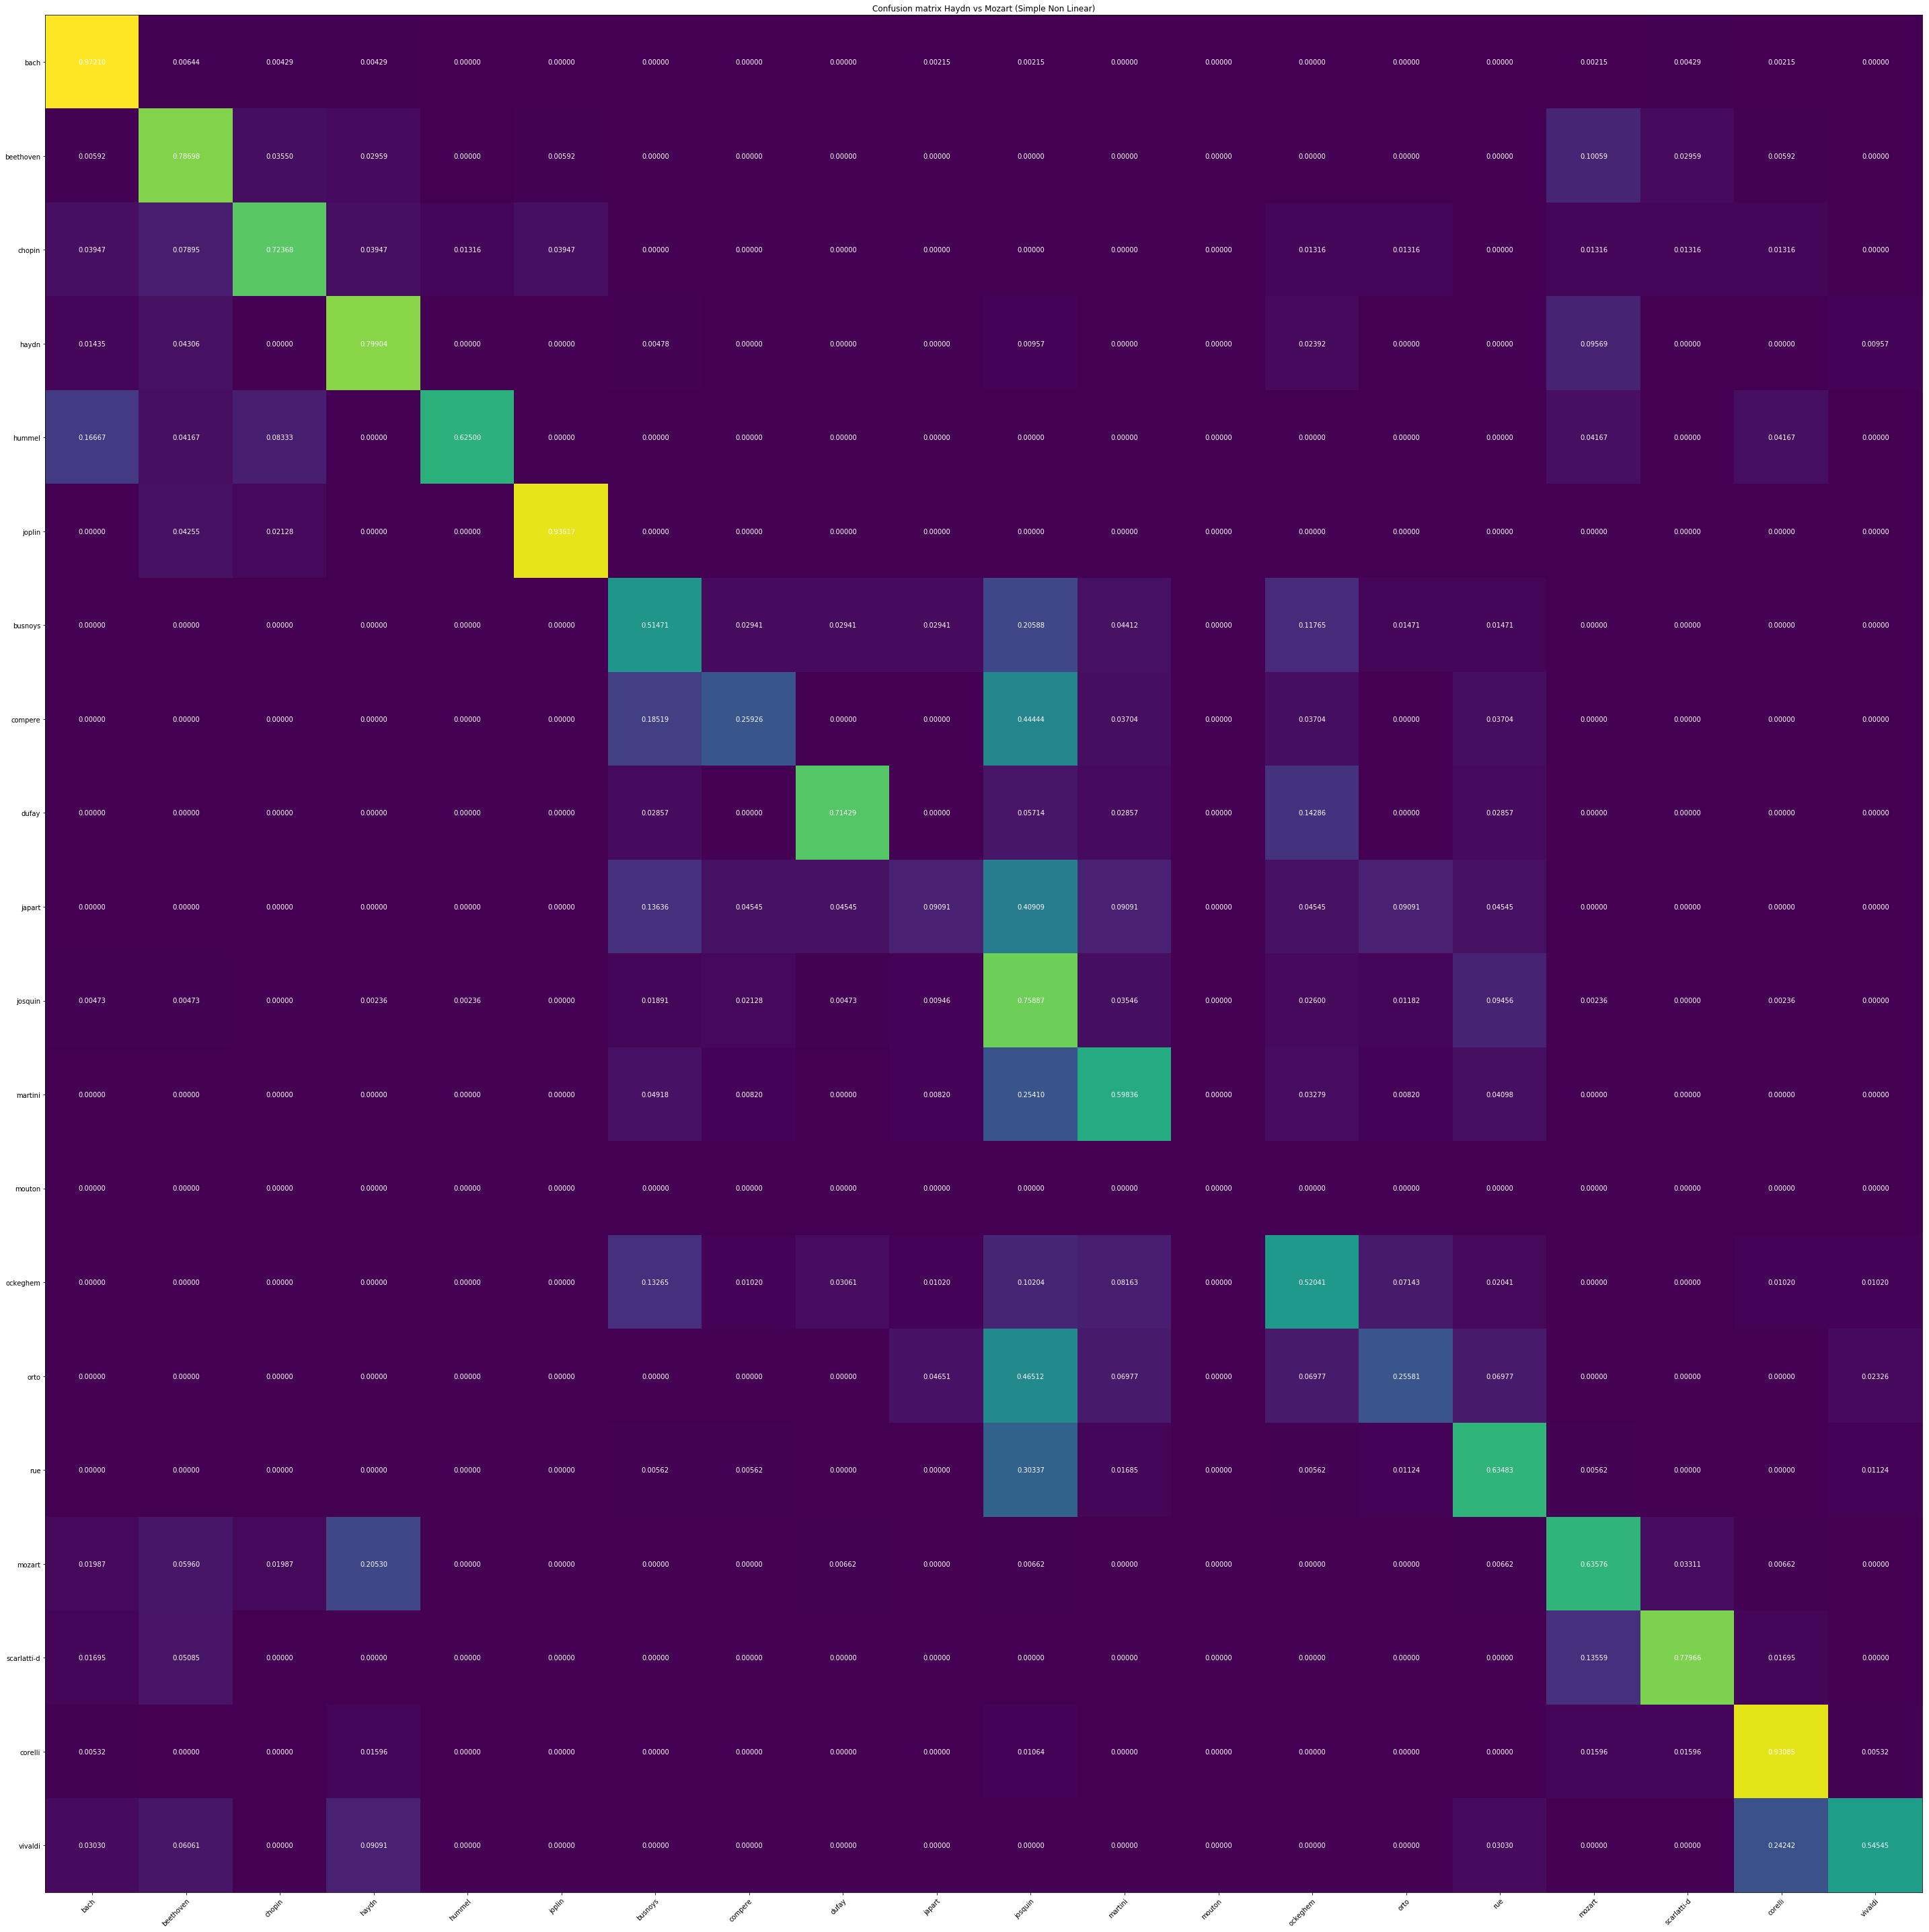

bach 49 / 52 = 0.9423076923076923
beethoven 21 / 25 = 0.84
busnoys 7 / 14 = 0.5
chopin 9 / 13 = 0.6923076923076923
compere 3 / 9 = 0.3333333333333333
corelli 25 / 26 = 0.9615384615384616
dufay 5 / 8 = 0.625
haydn 21 / 29 = 0.7241379310344828
hummel 3 / 6 = 0.5
japart 0 / 4 = 0.0
joplin 10 / 11 = 0.9090909090909091
josquin 32 / 45 = 0.7111111111111111
martini 10 / 14 = 0.7142857142857143
mozart 15 / 25 = 0.6
ockeghem 9 / 17 = 0.5294117647058824
orto 1 / 7 = 0.14285714285714285
rue 14 / 25 = 0.56
scarlatti-d 13 / 14 = 0.9285714285714286
vivaldi 3 / 4 = 0.75
250 348 0.7183908045977011
Final real overall test accuracy: 0.7547169811320755 (1840/2438)
  bach: 0.9721030042918455 (453/466)
  beethoven: 0.7869822485207101 (133/169)
  chopin: 0.7236842105263158 (55/76)
  haydn: 0.7990430622009569 (167/209)
  hummel: 0.625 (15/24)
  joplin: 0.9361702127659575 (44/47)
  busnoys: 0.5147058823529411 (35/68)
  compere: 0.25925925925925924 (7/27)
  dufay: 0.7142857142857143 (25/35)
  japart: 0.0909090

/home/thickstn/composers/lib/CrossValidation.py:243: RuntimeWarning: invalid value encountered in double_scalars
  accuracy = correct / float(total_scores)


In [8]:
validator = CrossValidator(Convnet, corpora, is_patches_model=True, patience=30, batch_size=32)
validator.run(context, checkpoint_dir=checkpoint_dir)